In [1]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ----------------- ---------------------- 4.2/9.9 MB 19.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 22.7 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# Load the dataset


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df_usage = pd.read_excel('PresentationData.xlsx', sheet_name='Hourly Usage')


In [3]:
df_usage.head()

,date,hour,id_865664259,id_556438708,id_797210973,id_159394858,id_398371246,id_622078427,id_247562058,id_423657958,...,id_816335515,id_301719675,id_236845199,id_496557256,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115
0,2024-01-01,1,24.24,19.800,5.28,5.811,1.3899,0.310,3.0,3.88,...,16.064,4.992,0.190,0.169,1494.6,6949.95,7973.0,11502.0,30.76,758.7
1,2024-01-01,2,25.24,19.320,6.08,5.298,0.9940,0.401,3.0,3.68,...,16.320,6.400,0.199,0.082,1491.0,7063.35,8113.0,11485.8,30.38,758.7
2,2024-01-01,3,25.20,19.788,5.44,5.730,0.9360,0.400,7.0,3.88,...,17.152,23.424,0.272,0.126,1486.8,6956.25,8127.0,11502.0,30.58,772.2
3,2024-01-01,4,24.72,19.440,5.60,5.211,0.9000,0.433,8.0,4.32,...,17.152,9.600,0.279,0.080,1480.8,7094.85,8183.0,11510.1,30.58,764.1
4,2024-01-01,5,24.64,19.800,4.96,6.452,1.0360,0.495,7.0,3.88,...,17.472,4.864,0.196,0.081,1488.0,6953.10,8288.0,11566.8,30.62,801.9


In [4]:
# Convert the 'Date' column to datetime format
df_usage['Date'] = pd.to_datetime(df_usage['date'])
# Set the 'Date' column as the index
df_usage["Day"] = df_usage["Date"].dt.day
df_usage["Month"] = df_usage["Date"].dt.month
df_usage.set_index('Date', inplace=True)
df_usage.drop(columns=['date'], inplace=True)


In [5]:
df_usage.head()

,hour,id_865664259,id_556438708,id_797210973,id_159394858,id_398371246,id_622078427,id_247562058,id_423657958,id_339238458,...,id_236845199,id_496557256,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115,Day,Month
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,1,24.24,19.800,5.28,5.811,1.3899,0.310,3.0,3.88,5.760,...,0.190,0.169,1494.6,6949.95,7973.0,11502.0,30.76,758.7,1,1
2024-01-01,2,25.24,19.320,6.08,5.298,0.9940,0.401,3.0,3.68,5.760,...,0.199,0.082,1491.0,7063.35,8113.0,11485.8,30.38,758.7,1,1
2024-01-01,3,25.20,19.788,5.44,5.730,0.9360,0.400,7.0,3.88,5.728,...,0.272,0.126,1486.8,6956.25,8127.0,11502.0,30.58,772.2,1,1
2024-01-01,4,24.72,19.440,5.60,5.211,0.9000,0.433,8.0,4.32,3.968,...,0.279,0.080,1480.8,7094.85,8183.0,11510.1,30.58,764.1,1,1
2024-01-01,5,24.64,19.800,4.96,6.452,1.0360,0.495,7.0,3.88,3.872,...,0.196,0.081,1488.0,6953.10,8288.0,11566.8,30.62,801.9,1,1


In [6]:
commercial_ids = [
    "id_865664259", "id_556438708", "id_797210973", "id_159394858",
    "id_423657958", "id_339238458", "id_680217490", "id_876648295",
    "id_816335515", "id_301719675"
]

residential_ids = [
    "id_398371246", "id_622078427", "id_247562058", "id_867297720",
    "id_424331807", "id_126971710", "id_935947466", "id_700971314",
    "id_236845199", "id_496557256"
]

industrial_ids = [
    "id_502927869", "id_700052256", "id_459726488", "id_627637245",
    "id_400133509", "id_833953115"
]


In [7]:
cols_base = ['hour', 'Day', 'Month']

df_commercial = df_usage[cols_base + commercial_ids].copy()
df_residential = df_usage[cols_base + residential_ids].copy()
df_industrial = df_usage[cols_base + industrial_ids].copy()


In [8]:
df_commercial.head()
df_residential.head()   
df_industrial.head()

,hour,Day,Month,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115
Date,,,,,,,,,
2024-01-01,1,1,1,1494.6,6949.95,7973.0,11502.0,30.76,758.7
2024-01-01,2,1,1,1491.0,7063.35,8113.0,11485.8,30.38,758.7
2024-01-01,3,1,1,1486.8,6956.25,8127.0,11502.0,30.58,772.2
2024-01-01,4,1,1,1480.8,7094.85,8183.0,11510.1,30.58,764.1
2024-01-01,5,1,1,1488.0,6953.10,8288.0,11566.8,30.62,801.9


In [9]:
df_residential.head() 

,hour,Day,Month,id_398371246,id_622078427,id_247562058,id_867297720,id_424331807,id_126971710,id_935947466,id_700971314,id_236845199,id_496557256
Date,,,,,,,,,,,,,
2024-01-01,1,1,1,1.3899,0.310,3.0,0.7360,0.218,0.3350,3.369,3.491,0.190,0.169
2024-01-01,2,1,1,0.9940,0.401,3.0,0.2210,0.220,0.3200,2.340,3.487,0.199,0.082
2024-01-01,3,1,1,0.9360,0.400,7.0,0.1739,0.214,0.2430,1.289,3.411,0.272,0.126
2024-01-01,4,1,1,0.9000,0.433,8.0,0.1870,0.243,0.2810,1.211,2.283,0.279,0.080
2024-01-01,5,1,1,1.0360,0.495,7.0,0.2120,0.227,0.3469,0.981,2.251,0.196,0.081


In [10]:
df_industrial.head()

,hour,Day,Month,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115
Date,,,,,,,,,
2024-01-01,1,1,1,1494.6,6949.95,7973.0,11502.0,30.76,758.7
2024-01-01,2,1,1,1491.0,7063.35,8113.0,11485.8,30.38,758.7
2024-01-01,3,1,1,1486.8,6956.25,8127.0,11502.0,30.58,772.2
2024-01-01,4,1,1,1480.8,7094.85,8183.0,11510.1,30.58,764.1
2024-01-01,5,1,1,1488.0,6953.10,8288.0,11566.8,30.62,801.9


In [11]:
df_commercial.to_excel('Commercial_Usage.xlsx')
df_residential.to_excel('Residential_Usage.xlsx')
df_industrial.to_excel('Industrial_Usage.xlsx')


PermissionError: [Errno 13] Permission denied: 'Commercial_Usage.xlsx'

In [12]:
import pandas as pd

# Creating the DataFrame manually from the given data
data = {
    "Account": [
        "id_865664259", "id_502927869", "id_556438708", "id_797210973", "id_159394858",
        "id_398371246", "id_622078427", "id_700052256", "id_459726488", "id_247562058",
        "id_423657958", "id_339238458", "id_867297720", "id_627637245", "id_400133509",
        "id_424331807", "id_680217490", "id_126971710", "id_935947466", "id_876648295",
        "id_700971314", "id_816335515", "id_833953115", "id_301719675", "id_236845199",
        "id_496557256"
    ],
    "Type": [
        "Commercial", "Industrial", "Commercial", "Commercial", "Commercial",
        "Residential", "Residential", "Industrial", "Industrial", "Residential",
        "Commercial", "Commercial", "Residential", "Industrial", "Industrial",
        "Residential", "Commercial", "Residential", "Residential", "Commercial",
        "Residential", "Commercial", "Industrial", "Commercial", "Residential",
        "Residential"
    ],
    "Rate": [
        "TOU-FD", "RTHPLL", "TOU-FD", "TOU-FD", "TOU-FD",
        "R", "R", "RTHPLL", "TOU-SC", "R",
        "TOU-FD", "TOU-FD", "R", "RTHPLL", "RTDPLM",
        "R", "TOU-FD", "R", "R", "TOU-FD",
        "R", "TOU-FD", "RTHTOURN", "TOU-FD", "R", "R"
    ],
    "Usage": [
        679259.42, 34562573.04, 363002.10, 109358.27, 116092.72,
        11090.35, 8815.33, 69135081.54, 139361929.00, 14822.07,
        107015.40, 101738.27, 7063.25, 216165789.45, 713118.03,
        7848.98, 233606.89, 7351.61, 14516.18, 66379.90,
        17963.18, 188791.00, 32938308.45, 133963.10, 8305.01,
        1513.58
    ]
}

df = pd.DataFrame(data)

# Summary analysis
type_usage = df.groupby("Type")["Usage"].sum().sort_values(ascending=False)
rate_usage = df.groupby("Rate")["Usage"].sum().sort_values(ascending=False)
top_accounts = df.sort_values("Usage", ascending=False).head(5)



type_usage, rate_usage, top_accounts


(Type
 Industrial     4.928768e+08
 Commercial     2.099207e+06
 Residential    9.928954e+04
 Name: Usage, dtype: float64,
 Rate
 RTHPLL      3.198634e+08
 TOU-SC      1.393619e+08
 RTHTOURN    3.293831e+07
 TOU-FD      2.099207e+06
 RTDPLM      7.131180e+05
 R           9.928954e+04
 Name: Usage, dtype: float64,
          Account        Type      Rate         Usage
 13  id_627637245  Industrial    RTHPLL  2.161658e+08
 8   id_459726488  Industrial    TOU-SC  1.393619e+08
 7   id_700052256  Industrial    RTHPLL  6.913508e+07
 1   id_502927869  Industrial    RTHPLL  3.456257e+07
 22  id_833953115  Industrial  RTHTOURN  3.293831e+07)

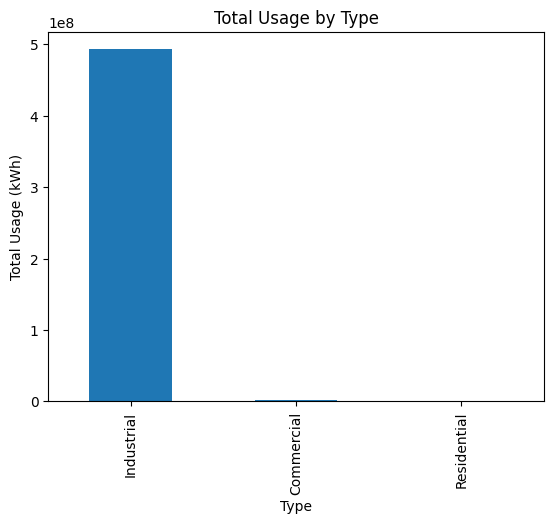

In [13]:
type_usage.plot(kind='bar', title='Total Usage by Type', ylabel='Total Usage (kWh)', xlabel='Type')
plt.show()

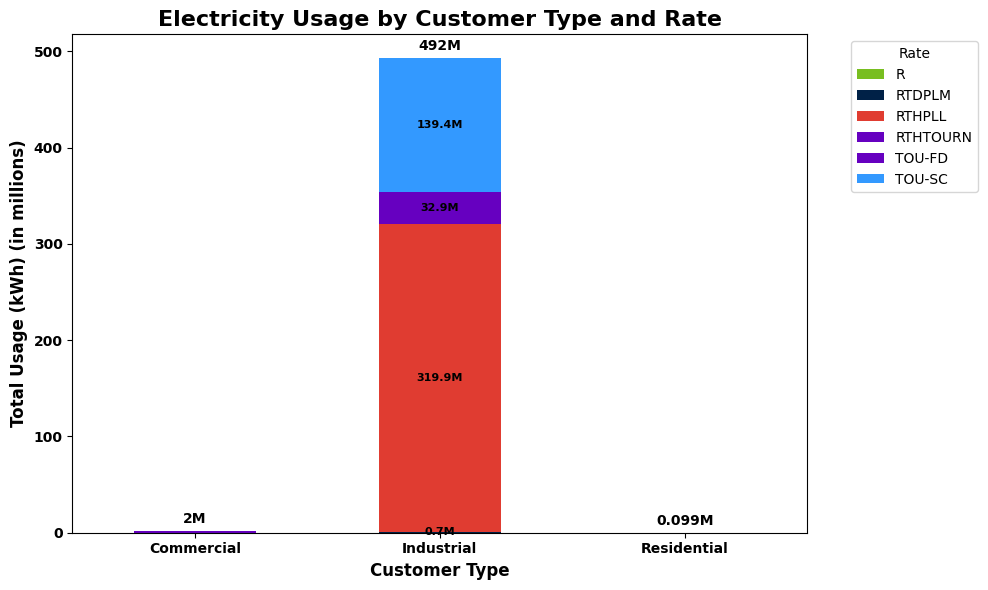

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for stacked bar plot: usage by Type and Rate
usage_by_type_rate = df.groupby(["Type", "Rate"])["Usage"].sum().unstack(fill_value=0)

# Define Southern Company colors for Rate types if possible
# Define a mixed red-blue palette and distinct green for Residential
custom_palette = {
    'RTHPLL': '#e03c31',     
    'TOU-SC': '#3399ff',     
    'RTHTOURN':  "#6600c0",
    'TOU-FD': "#6600c0",     # Blue
    'RTDPLM': '#002147',     # Light Blue
    'R': '#78be20'           # Green for Residential
}

# Apply color order
colors = [custom_palette[rate] for rate in usage_by_type_rate.columns]

# Replot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = usage_by_type_rate.plot(kind="bar", stacked=True, ax=ax, color=colors)

# Annotate only industrial customer type bars
for container, rate in zip(bars.containers, usage_by_type_rate.columns):
    for i, bar in enumerate(container):
        if usage_by_type_rate.index[i] == "Industrial":
            height = bar.get_height()
            if height > 0:
                x_pos = bar.get_x() + bar.get_width() / 2
                y_pos = bar.get_y() + height / 2
                value_millions = height / 1e6
                ax.text(
                    x_pos, y_pos,
                    f"{value_millions:.1f}M",
                    ha='center', va='center',
                    fontsize=8, fontweight='bold'
                )

# Annotate total usage on top of each customer type
totals = usage_by_type_rate.sum(axis=1)
for i, (type_name, total) in enumerate(totals.items()):
    label = f"{int(total/1e6):,}M" if type_name != 'Residential' else "0.099M"
    ax.text(i, total + 5e6, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Title and axis labels
ax.set_title("Electricity Usage by Customer Type and Rate", fontsize=16, fontweight='bold')
ax.set_xlabel("Customer Type", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Usage (kWh) (in millions)", fontsize=12, fontweight='bold')

# Format y-axis in millions and remove scientific notation
ax.ticklabel_format(style='plain', axis='y')
y_labels = ax.get_yticks()
ax.set_yticklabels([f"{int(label/1e6):,}" for label in y_labels], fontsize=10, fontweight='bold')

# Format x-axis
ax.tick_params(axis='x', labelsize=10, labelrotation=0)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Remove grid
ax.grid(False)

# Adjust legend
ax.legend(title="Rate", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()






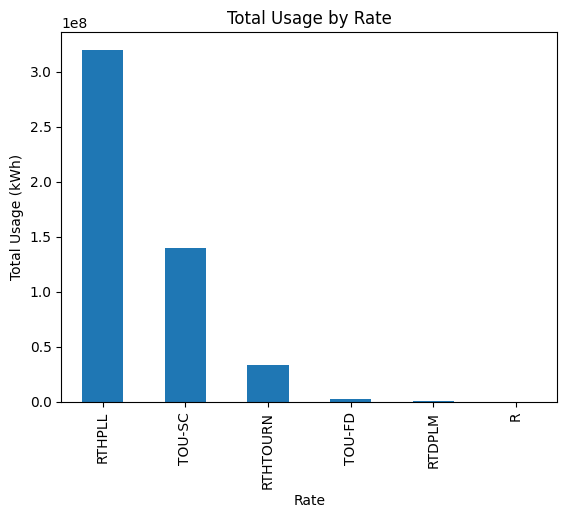

In [30]:
rate_usage.plot(kind='bar', title='Total Usage by Rate', ylabel='Total Usage (kWh)', xlabel='Rate')
plt.show()

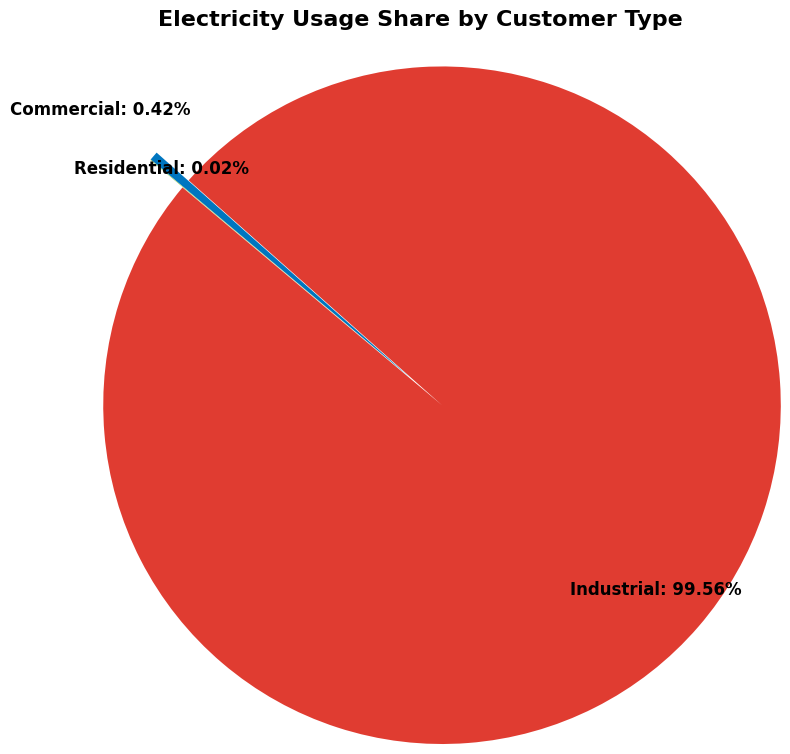

In [38]:
# Southern Company brand colors
southern_colors = {
    'Industrial': '#e03c31',   # Red
    'Commercial': '#0076c0',   # Blue
    'Residential': '#78be20'   # Green
}

# Sorted usage to match pie chart order
type_usage_sorted = type_usage.sort_values(ascending=False)
colors = [southern_colors[t] for t in type_usage_sorted.index]
explode = [0.1 if t == "Industrial" else 0.05 for t in type_usage_sorted.index]  # Emphasize all slightly

# Plot pie chart with external percentage labels
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(
    type_usage_sorted,
    startangle=140,
    colors=colors,
    explode=explode,
    radius=1.2
)

# Calculate total for percentage computation
total = type_usage_sorted.sum()
angle = 140  # Initial angle

# Annotate each wedge with label and percentage, spacing Residential and Commercial manually
custom_offsets = {
    "Industrial": 1.1,
    "Commercial": 1.5,   # Move Commercial slightly farther
    "Residential": 1.2   # Move Residential even farther
}

for i, (label, value) in enumerate(type_usage_sorted.items()):
    pct = value / total * 100
    theta = (angle + (value / total * 360) / 2) * (np.pi / 180)
    r = custom_offsets[label]
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.text(x, y, f"{label}: {pct:.2f}%", ha='center', va='center', fontsize=12, fontweight='bold')
    angle += (value / total) * 360

ax.set_title("Electricity Usage Share by Customer Type", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



In [73]:
import pandas as pd

# Load the uploaded Excel file
file_path = "Hourly_usage.xlsx"
excel_data = pd.read_excel(file_path, sheet_name=None)

# Extract sheet names and load all sheets
sheet_names = excel_data.keys()
seasonal_data = {name: excel_data[name].fillna(0) for name in sheet_names}

# Combine sheets into one DataFrame for seasonal comparison
combined_df = pd.concat(seasonal_data, names=["Season", "Index"]).reset_index(level=0)

# Display first few rows of the combined data for inspection
combined_df.head()


,Season,date,hour,id_865664259,id_556438708,id_797210973,id_159394858,id_398371246,id_622078427,id_247562058,id_423657958,id_339238458,id_867297720,id_424331807,id_680217490,id_126971710,id_935947466,id_876648295,id_700971314,id_816335515,id_301719675,id_236845199,id_496557256,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Hourly Usage,2024-01-01,1,24.24,19.800,5.28,5.811,1.3899,0.310,3.0,3.88,5.760,0.7360,0.218,19.12,0.3350,3.369,4.964,3.491,16.064,4.992,0.190,0.169,1494.6,6949.95,7973.0,11502.0,30.76,758.7
1,Hourly Usage,2024-01-01,2,25.24,19.320,6.08,5.298,0.9940,0.401,3.0,3.68,5.760,0.2210,0.220,21.84,0.3200,2.340,4.861,3.487,16.320,6.400,0.199,0.082,1491.0,7063.35,8113.0,11485.8,30.38,758.7
2,Hourly Usage,2024-01-01,3,25.20,19.788,5.44,5.730,0.9360,0.400,7.0,3.88,5.728,0.1739,0.214,22.00,0.2430,1.289,4.930,3.411,17.152,23.424,0.272,0.126,1486.8,6956.25,8127.0,11502.0,30.58,772.2
3,Hourly Usage,2024-01-01,4,24.72,19.440,5.60,5.211,0.9000,0.433,8.0,4.32,3.968,0.1870,0.243,20.72,0.2810,1.211,4.852,2.283,17.152,9.600,0.279,0.080,1480.8,7094.85,8183.0,11510.1,30.58,764.1
4,Hourly Usage,2024-01-01,5,24.64,19.800,4.96,6.452,1.0360,0.495,7.0,3.88,3.872,0.2120,0.227,16.80,0.3469,0.981,5.588,2.251,17.472,4.864,0.196,0.081,1488.0,6953.10,8288.0,11566.8,30.62,801.9


In [51]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Step 1: Convert date and hour to full datetime
combined_df['datetime'] = pd.to_datetime(combined_df['date']) + pd.to_timedelta(combined_df['hour'] - 1, unit='h')
# Step 2 (fixed): Ensure all usage columns are numeric before summing
# Step 2 (fixed): Define numeric usage columns only
non_usage_cols = ['Season', 'date', 'hour', 'datetime', 'month', 'day_of_week', 'season', 'total_usage']
usage_columns = [col for col in combined_df.columns if col not in non_usage_cols]

# Convert to numeric safely
combined_df[usage_columns] = combined_df[usage_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Recompute total usage
combined_df['total_usage'] = combined_df[usage_columns].sum(axis=1)

# Step 3: Add derived time features for seasonal approximation
combined_df['month'] = combined_df['datetime'].dt.month
combined_df['day_of_week'] = combined_df['datetime'].dt.day_name()
combined_df['hour'] = combined_df['datetime'].dt.hour

# Approximate seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df['season'] = combined_df['month'].apply(get_season)

# Step 4: Aggregate for various visualizations
# 1. Total usage by season
seasonal_usage = combined_df.groupby('season')['total_usage'].sum().sort_values(ascending=False)

# 2. Average hourly usage across all accounts by hour
hourly_avg_usage = combined_df.groupby('hour')['total_usage'].mean()

# 3. Monthly trend
monthly_usage = combined_df.groupby('month')['total_usage'].sum()

# 4. Top usage accounts over entire period
account_totals = combined_df[usage_columns].sum().sort_values(ascending=False).head(5)

# 5. Heatmap data: average usage by hour and day of week
heatmap_data = combined_df.groupby(['day_of_week', 'hour'])['total_usage'].mean().unstack()

seasonal_usage, hourly_avg_usage, monthly_usage, account_totals, heatmap_data


(season
 Summer    1.354443e+08
 Fall      1.272358e+08
 Spring    1.218560e+08
 Winter    1.105392e+08
 Name: total_usage, dtype: float64,
 hour
 0     55395.009449
 1     54785.892107
 2     54769.451444
 3     54821.881820
 4     54784.655913
 5     54924.445257
 6     55303.642887
 7     56616.416839
 8     57051.390999
 9     57096.104455
 10    57605.090966
 11    57872.640439
 12    58005.284147
 13    58142.983361
 14    58035.354646
 15    57904.049132
 16    57374.480454
 17    56216.937631
 18    55679.023835
 19    56234.962114
 20    56213.052452
 21    56150.274008
 22    56009.346580
 23    55672.372556
 Name: total_usage, dtype: float64,
 month
 1     3.822345e+07
 2     3.798628e+07
 3     4.078679e+07
 4     4.006404e+07
 5     4.100516e+07
 6     4.342521e+07
 7     4.479591e+07
 8     4.722319e+07
 9     4.393869e+07
 10    4.359186e+07
 11    3.970523e+07
 12    3.432950e+07
 Name: total_usage, dtype: float64,
 id_627637245    2.161658e+08
 id_459726488    1.393619

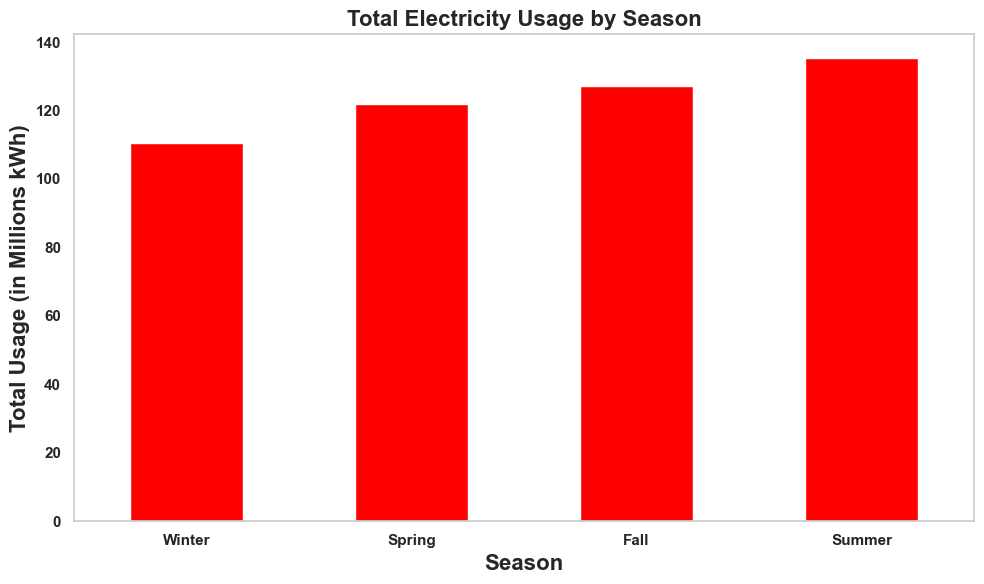

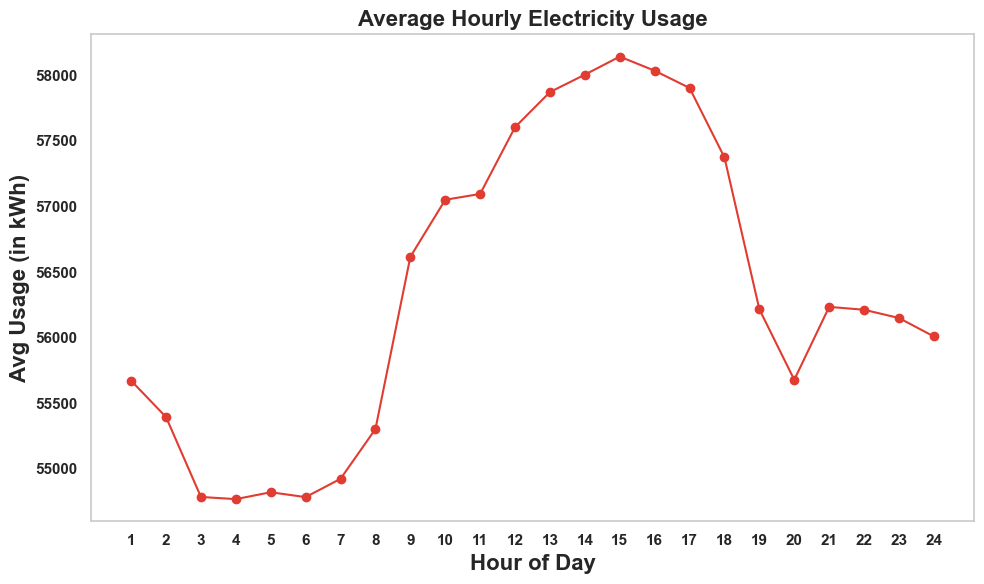

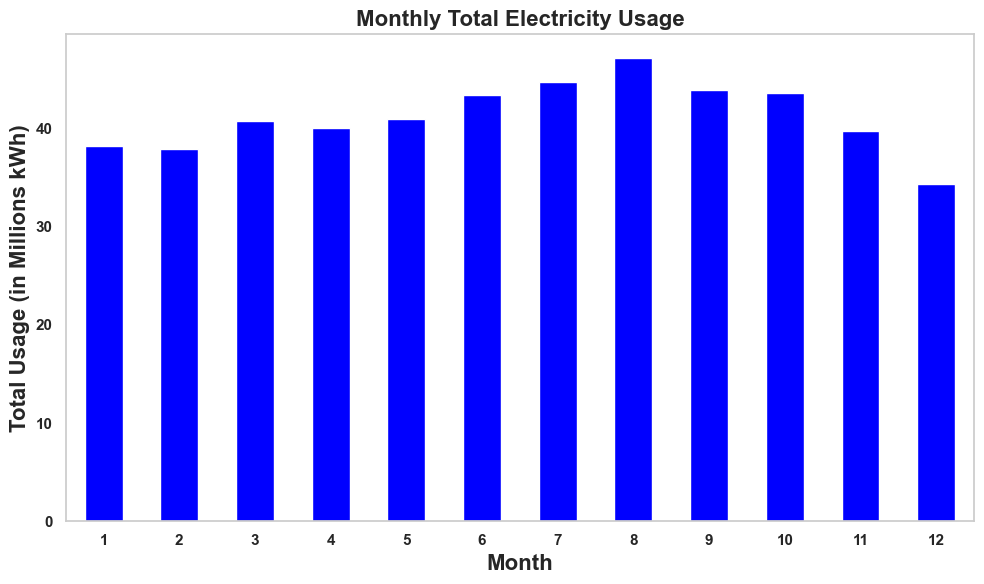

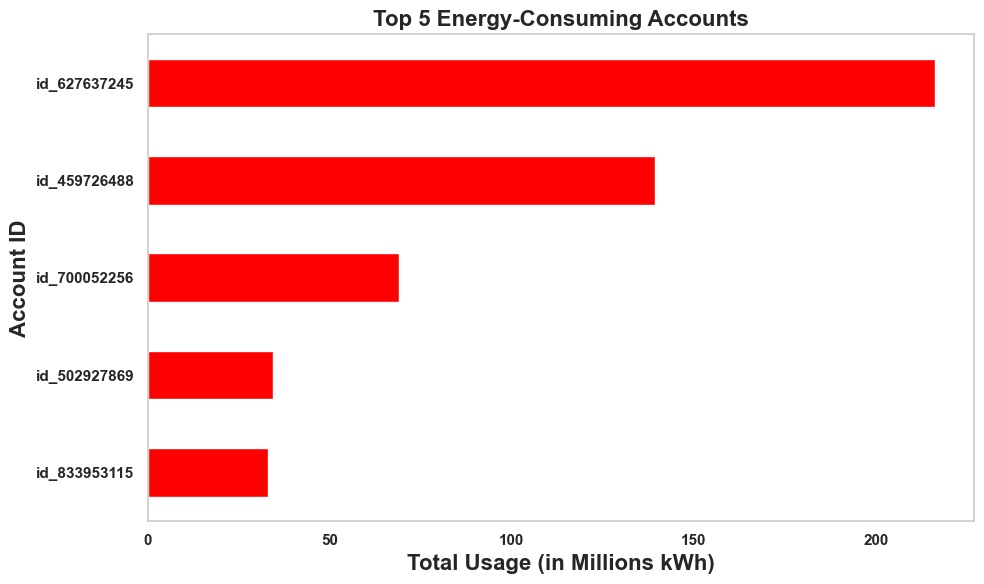

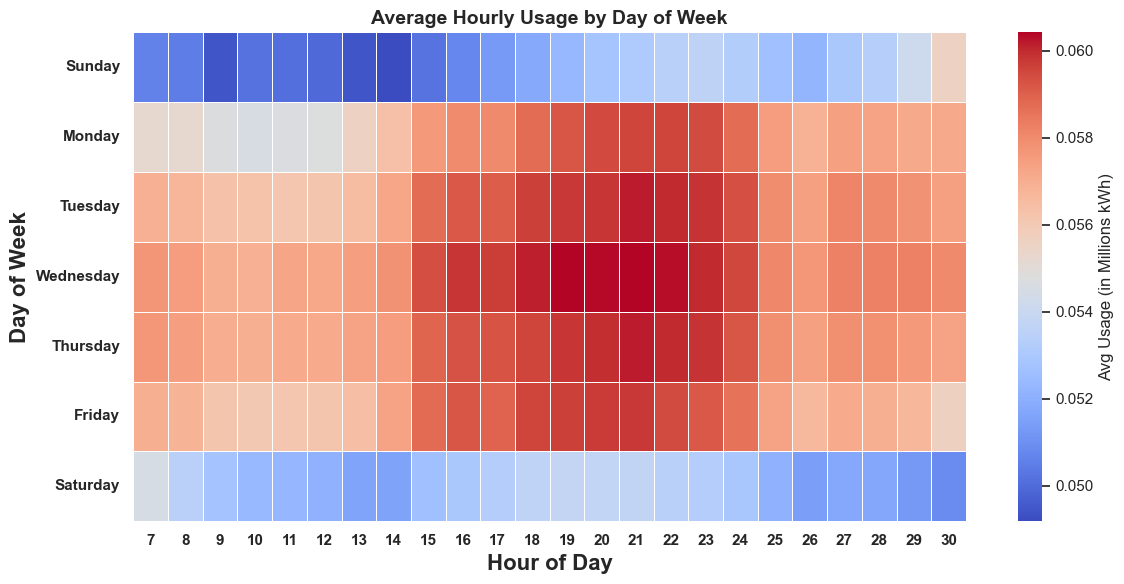

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (10, 6)

# 1. Seasonal Total Usage
plt.figure(figsize=figsize)
(seasonal_usage/(1e6)).sort_values().plot(kind='bar', color="red")
plt.title("Total Electricity Usage by Season", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(False)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

# Ensure all hours from 0 to 23 are present before shift
import numpy as np

# Recalculate hourly_avg_usage to make sure it's complete
hourly_avg_usage = combined_df.groupby('hour')['total_usage'].mean().reindex(range(24), fill_value=0)

# Now shift for label display only
hourly_avg_usage.index = np.arange(1, 25)

# Plot
plt.figure(figsize=(10, 6))
hourly_avg_usage.plot(kind='line', marker='o', color='#e03c31')
plt.title("Average Hourly Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Avg Usage (in kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=16, fontweight='bold')
plt.xticks(np.arange(1, 25))
plt.grid(False)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


# 3. Monthly Usage
plt.figure(figsize=figsize)
(monthly_usage/1e6).plot(kind='bar', color="blue")
plt.title("Monthly Total Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(False)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Top Accounts by Usage
plt.figure(figsize=figsize)
(account_totals/1e6).sort_values().plot(kind='barh', color="red")
plt.title("Top 5 Energy-Consuming Accounts", fontsize=16, fontweight='bold')
plt.xlabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.ylabel("Account ID", fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# Fix column labels (1–24)
heatmap_data.columns = [h + 1 for h in heatmap_data.columns]

# Reorder rows (Sunday → Saturday)
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data / 1e6, cmap="coolwarm", linewidths=0.5, annot=False,
            cbar_kws={'label': 'Avg Usage (in Millions kWh)'})
plt.title("Average Hourly Usage by Day of Week", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=16, fontweight='bold')
plt.ylabel("Day of Week", fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()




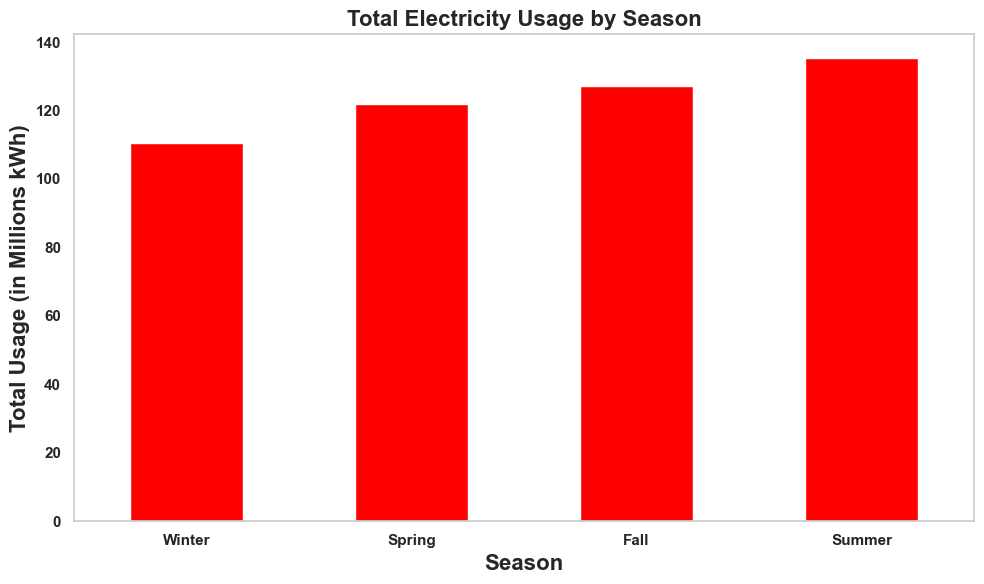

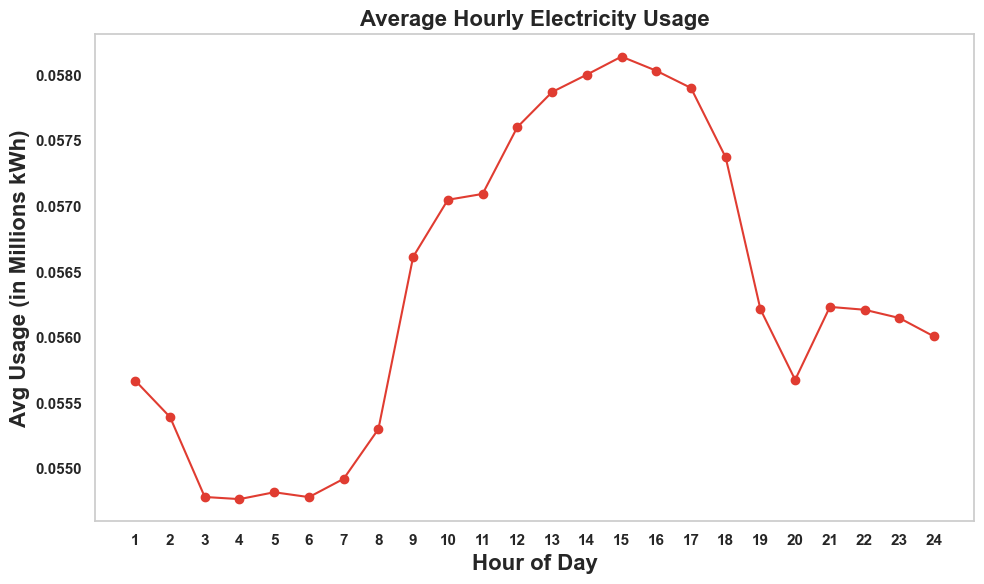

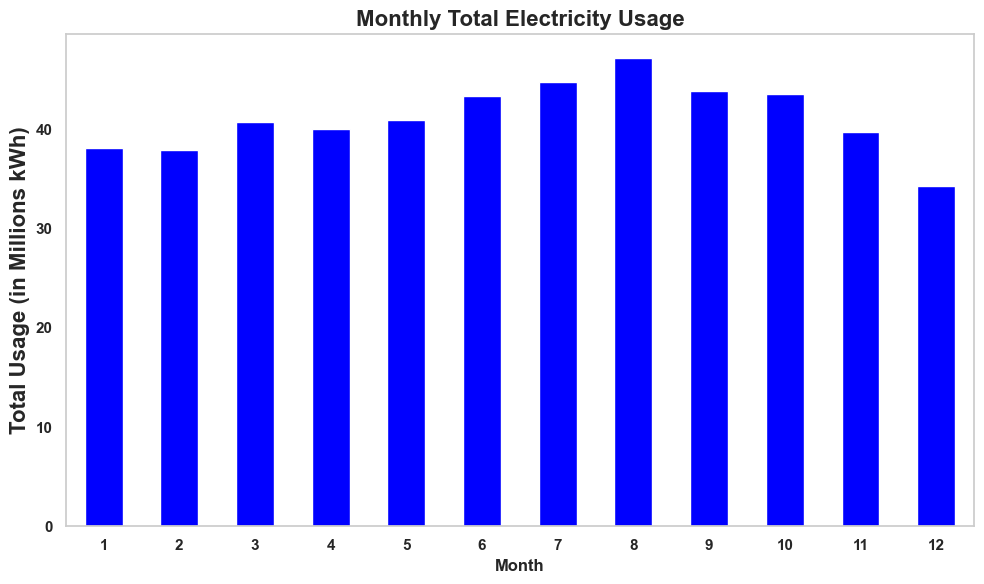

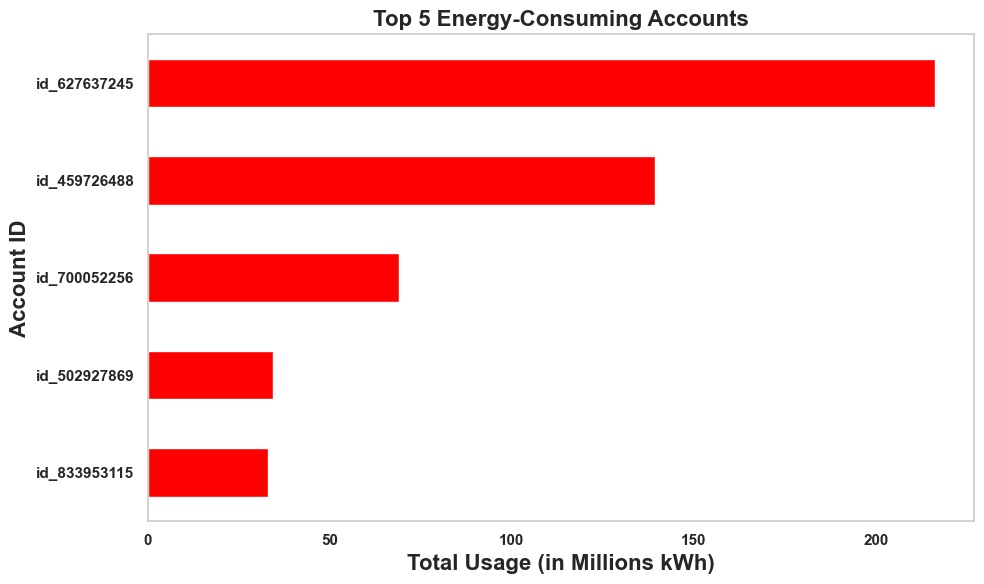

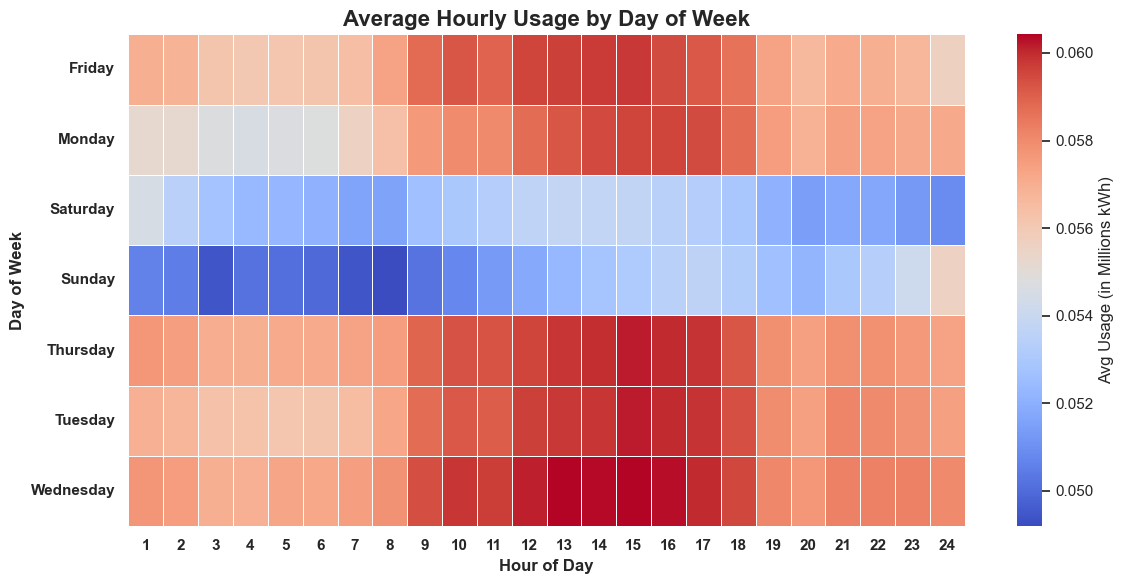

In [93]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reload the original Excel file
file_path = "Hourly_usage.xlsx"
combined_df = pd.read_excel(file_path)

# Fix nulls and prepare time
combined_df.fillna(0, inplace=True)
combined_df['datetime'] = pd.to_datetime(combined_df['date']) + pd.to_timedelta(combined_df['hour'] - 1, unit='h')

# Recreate time features
combined_df['month'] = combined_df['datetime'].dt.month
combined_df['day_of_week'] = combined_df['datetime'].dt.day_name()
combined_df['hour'] = combined_df['datetime'].dt.hour

# Define numeric usage columns
non_usage_cols = ['Season', 'date', 'hour', 'datetime', 'month', 'day_of_week', 'season', 'total_usage']
usage_columns = [col for col in combined_df.columns if col not in non_usage_cols and combined_df[col].dtype in [np.float64, np.int64]]
combined_df[usage_columns] = combined_df[usage_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
combined_df['total_usage'] = combined_df[usage_columns].sum(axis=1)

# Derive season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
combined_df['season'] = combined_df['month'].apply(get_season)

# Aggregate summaries
seasonal_usage = combined_df.groupby('season')['total_usage'].sum().sort_values(ascending=False)
hourly_avg_usage = combined_df.groupby('hour')['total_usage'].mean().reindex(range(24), fill_value=0)
monthly_usage = combined_df.groupby('month')['total_usage'].sum()
account_totals = combined_df[usage_columns].sum().sort_values(ascending=False).head(5)
heatmap_data = combined_df.groupby(['day_of_week', 'hour'])['total_usage'].mean().unstack()

# Adjust hourly index for plotting
hourly_avg_usage.index = np.arange(1, 25)
heatmap_data.columns = [h + 1 for h in heatmap_data.columns]

# Plotting with updated styles
figsize = (10, 6)

# 1. Seasonal Total Usage
plt.figure(figsize=figsize)
seasonal_usage.sort_values().div(1e6).plot(kind='bar', color="red")
plt.title("Total Electricity Usage by Season", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Hourly Average Usage
plt.figure(figsize=(10, 6))
(hourly_avg_usage / 1e6).plot(kind='line', marker='o', color='#e03c31')
plt.title("Average Hourly Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Avg Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=16, fontweight='bold')
plt.xticks(np.arange(1, 25), fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 3. Monthly Usage
plt.figure(figsize=figsize)
(monthly_usage / 1e6).plot(kind='bar', color="blue")
plt.title("Monthly Total Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 4. Top Accounts by Usage
plt.figure(figsize=figsize)
(account_totals / 1e6).sort_values().plot(kind='barh', color="red")
plt.title("Top 5 Energy-Consuming Accounts", fontsize=16, fontweight='bold')
plt.xlabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.ylabel("Account ID", fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 5. Heatmap of Usage by Day and Hour
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data / 1e6, cmap="coolwarm", linewidths=0.5, annot=False, cbar_kws={'label': 'Avg Usage (in Millions kWh)'})
plt.title("Average Hourly Usage by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Day of Week", fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


In [94]:
commercial_ids = [
    "id_865664259", "id_556438708", "id_797210973", "id_159394858",
    "id_423657958", "id_339238458", "id_680217490", "id_876648295",
    "id_816335515", "id_301719675"
]

residential_ids = [
    "id_398371246", "id_622078427", "id_247562058", "id_867297720",
    "id_424331807", "id_126971710", "id_935947466", "id_700971314",
    "id_236845199", "id_496557256"
]

industrial_ids = [
    "id_502927869", "id_700052256", "id_459726488", "id_627637245",
    "id_400133509", "id_833953115"
]

In [95]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reload the original Excel file
file_path = "Hourly_usage.xlsx"
combined_df = pd.read_excel(file_path)

In [96]:
combined_df

,date,hour,id_865664259,id_556438708,id_797210973,id_159394858,id_398371246,id_622078427,id_247562058,id_423657958,id_339238458,id_867297720,id_424331807,id_680217490,id_126971710,id_935947466,id_876648295,id_700971314,id_816335515,id_301719675,id_236845199,id_496557256,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115
0,2024-01-01,1,24.240,19.800,5.28,5.811,1.3899,0.310,3.000,3.88,5.7600,0.7360,0.2180,19.120,0.3350,3.3690,4.9640,3.491,16.0640,4.992,0.190,0.1690,1494.60,6949.95,7973.0,11502.0,30.76,758.7
1,2024-01-01,2,25.240,19.320,6.08,5.298,0.9940,0.401,3.000,3.68,5.7600,0.2210,0.2200,21.840,0.3200,2.3400,4.8610,3.487,16.3200,6.400,0.199,0.0820,1491.00,7063.35,8113.0,11485.8,30.38,758.7
2,2024-01-01,3,25.200,19.788,5.44,5.730,0.9360,0.400,7.000,3.88,5.7280,0.1739,0.2140,22.000,0.2430,1.2890,4.9300,3.411,17.1520,23.424,0.272,0.1260,1486.80,6956.25,8127.0,11502.0,30.58,772.2
3,2024-01-01,4,24.720,19.440,5.60,5.211,0.9000,0.433,8.000,4.32,3.9680,0.1870,0.2430,20.720,0.2810,1.2110,4.8520,2.283,17.1520,9.600,0.279,0.0800,1480.80,7094.85,8183.0,11510.1,30.58,764.1
4,2024-01-01,5,24.640,19.800,4.96,6.452,1.0360,0.495,7.000,3.88,3.8720,0.2120,0.2270,16.800,0.3469,0.9810,5.5880,2.251,17.4720,4.864,0.196,0.0810,1488.00,6953.10,8288.0,11566.8,30.62,801.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31,20,28.156,19.680,10.08,11.046,0.7010,0.546,2.291,13.76,27.1790,0.8870,0.4180,29.992,0.4190,0.1420,3.2929,4.916,19.5169,6.272,0.258,0.4640,2683.80,6221.88,11193.0,9695.7,104.72,1093.5
8780,2024-12-31,21,27.912,19.680,9.92,7.717,0.5379,0.419,1.980,13.68,10.0629,1.3670,0.5600,27.840,0.4130,0.3660,4.7570,3.197,18.9130,6.144,2.698,0.1719,2640.60,6717.06,11228.0,9695.7,83.60,1061.1
8781,2024-12-31,22,27.720,20.400,7.20,7.472,0.5220,0.250,0.665,9.04,7.3889,0.4530,0.4080,28.552,0.4200,0.3599,6.3210,3.763,18.0120,5.888,0.734,0.0700,2541.24,6900.39,11249.0,9630.9,73.58,1069.2
8782,2024-12-31,23,22.040,20.148,6.56,7.996,0.5620,0.396,2.172,6.32,5.8650,0.3820,0.4699,27.272,1.3500,0.2180,5.8150,2.165,14.8640,6.144,0.262,0.1160,2549.88,6962.76,11319.0,9663.3,72.96,1074.6


In [98]:
residential_df = combined_df[["date", "hour"] + residential_ids].copy()
industrial_df = combined_df[["date", "hour"] + industrial_ids].copy()
commercial_df = combined_df[["date", "hour"] + commercial_ids].copy()

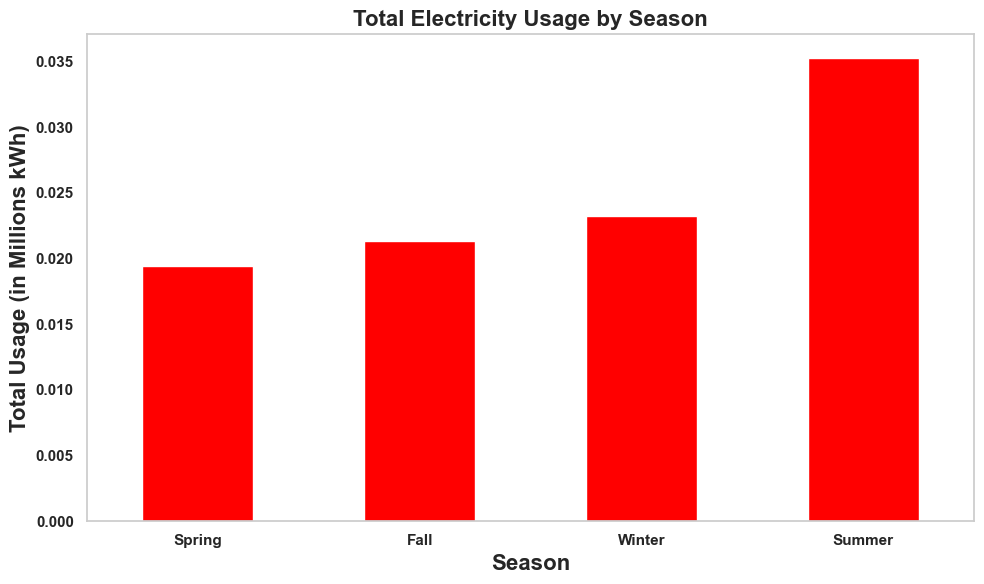

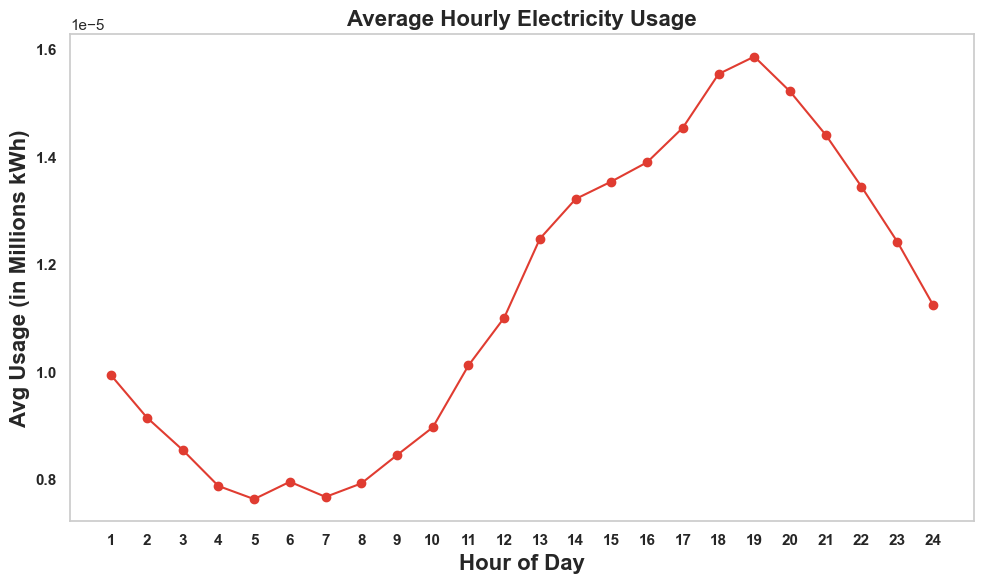

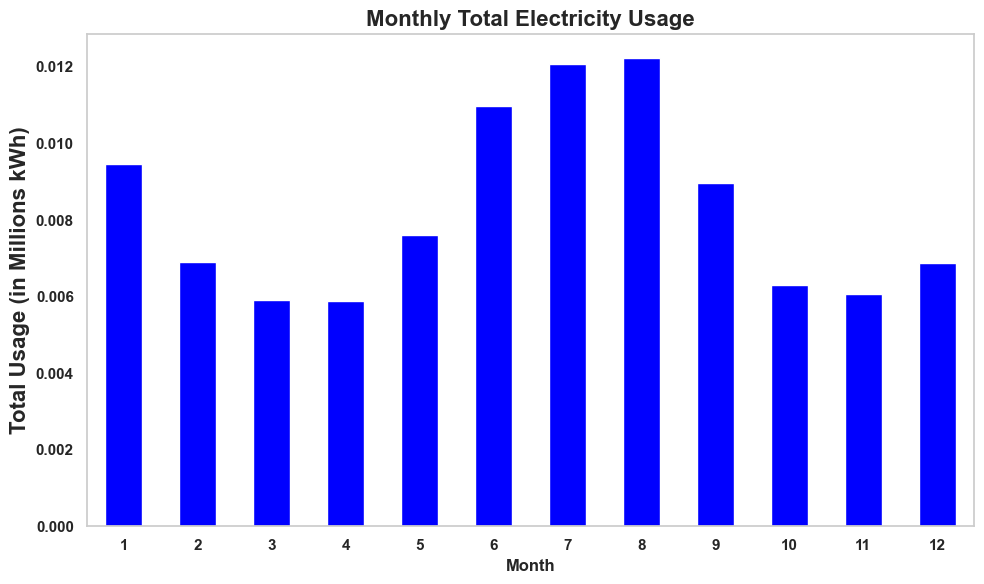

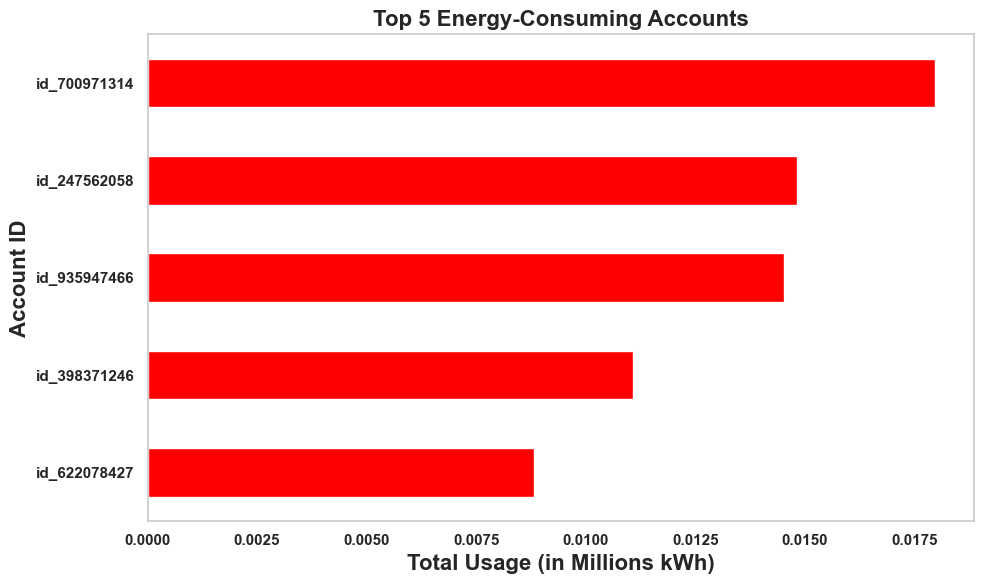

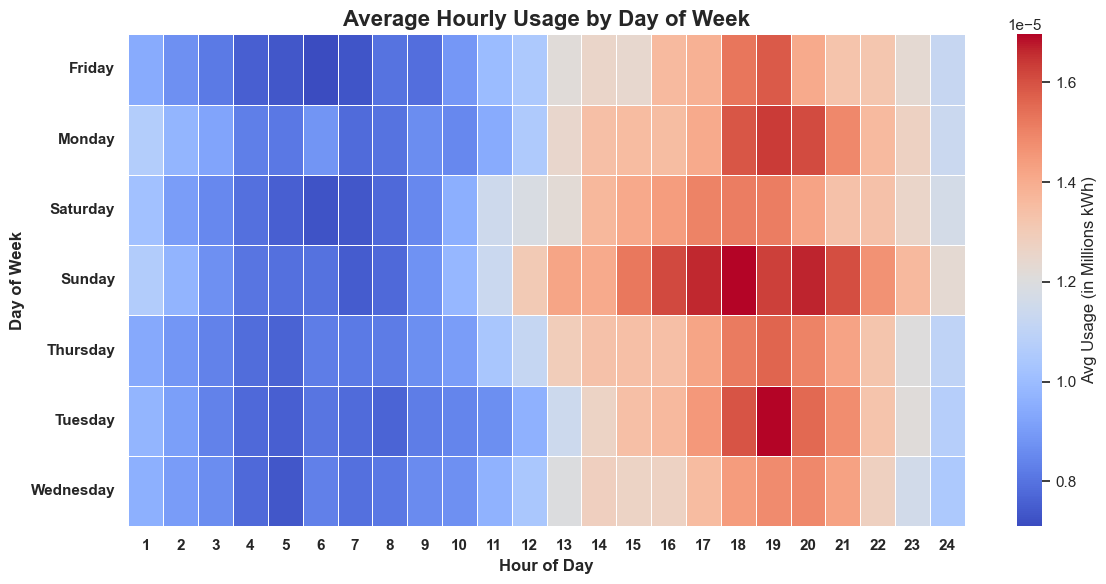

In [ ]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Fix nulls and prepare time
residential_df.fillna(0, inplace=True)
residential_df['datetime'] = pd.to_datetime(residential_df['date']) + pd.to_timedelta(commercial_df['hour'] - 1, unit='h')

# Recreate time features
residential_df['month'] = residential_df['datetime'].dt.month
residential_df['day_of_week'] = residential_df['datetime'].dt.day_name()
residential_df['hour'] = residential_df['datetime'].dt.hour

# Define numeric usage columns
non_usage_cols = ['Season', 'date', 'hour', 'datetime', 'month', 'day_of_week', 'season', 'total_usage']
usage_columns = [col for col in residential_df.columns if col not in non_usage_cols and residential_df[col].dtype in [np.float64, np.int64]]
residential_df[usage_columns] = residential_df[usage_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
residential_df['total_usage'] = residential_df[usage_columns].sum(axis=1)

# Derive season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
residential_df['season'] = residential_df['month'].apply(get_season)

# Aggregate summaries
seasonal_usage = residential_df.groupby('season')['total_usage'].sum().sort_values(ascending=False)
hourly_avg_usage = residential_df.groupby('hour')['total_usage'].mean().reindex(range(24), fill_value=0)
monthly_usage = residential_df.groupby('month')['total_usage'].sum()
account_totals = residential_df[usage_columns].sum().sort_values(ascending=False).head(5)
heatmap_data = residential_df.groupby(['day_of_week', 'hour'])['total_usage'].mean().unstack()

# Adjust hourly index for plotting
hourly_avg_usage.index = np.arange(1, 25)
heatmap_data.columns = [h + 1 for h in heatmap_data.columns]

# Plotting with updated styles
figsize = (10, 6)

# 1. Seasonal Total Usage
plt.figure(figsize=figsize)
seasonal_usage.sort_values().div(1e6).plot(kind='bar', color="red")
plt.title("Total Electricity Usage by Season", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Hourly Average Usage
plt.figure(figsize=(10, 6))
(hourly_avg_usage / 1e6).plot(kind='line', marker='o', color='#e03c31')
plt.title("Average Hourly Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Avg Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=16, fontweight='bold')
plt.xticks(np.arange(1, 25), fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 3. Monthly Usage
plt.figure(figsize=figsize)
(monthly_usage / 1e6).plot(kind='bar', color="blue")
plt.title("Monthly Total Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 4. Top Accounts by Usage
plt.figure(figsize=figsize)
(account_totals / 1e6).sort_values().plot(kind='barh', color="red")
plt.title("Top 5 Energy-Consuming Accounts", fontsize=16, fontweight='bold')
plt.xlabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.ylabel("Account ID", fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 5. Heatmap of Usage by Day and Hour
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data / 1e6, cmap="coolwarm", linewidths=0.5, annot=False, cbar_kws={'label': 'Avg Usage (in Millions kWh)'})
plt.title("Average Hourly Usage by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Day of Week", fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

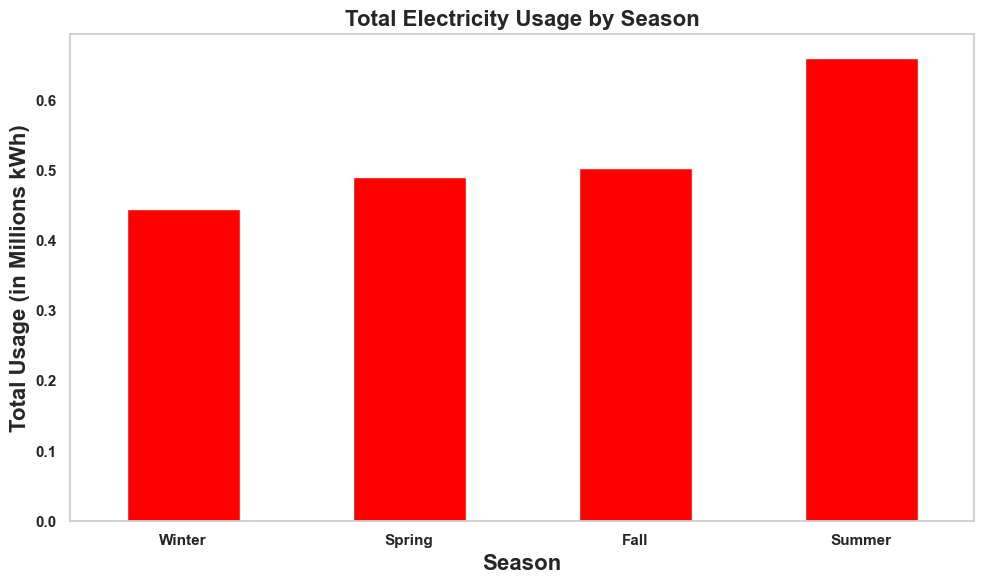

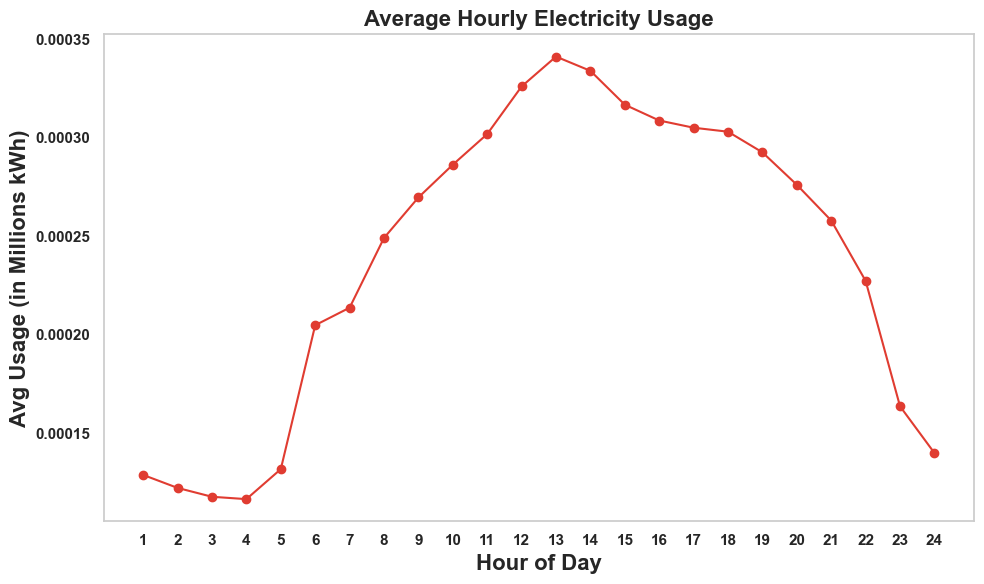

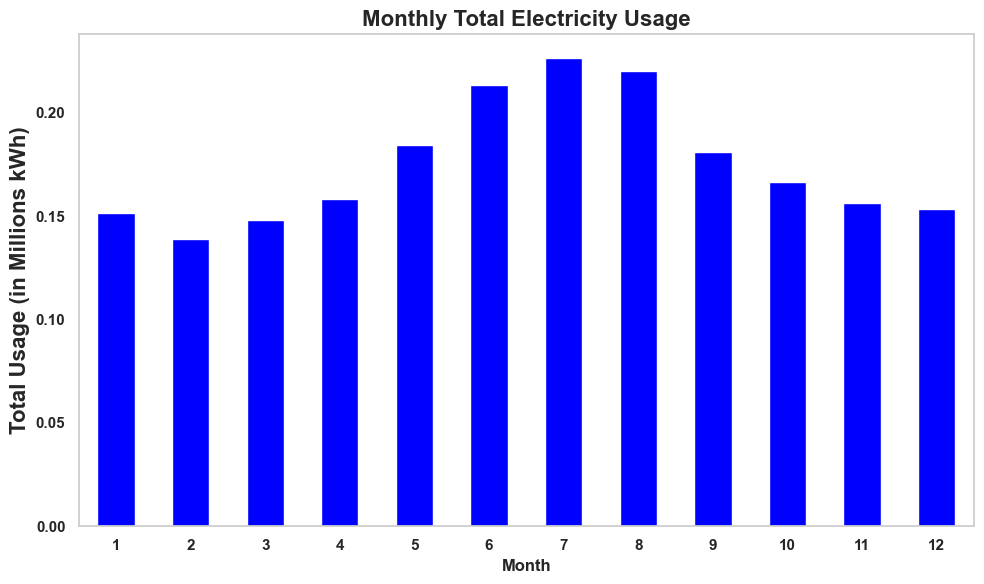

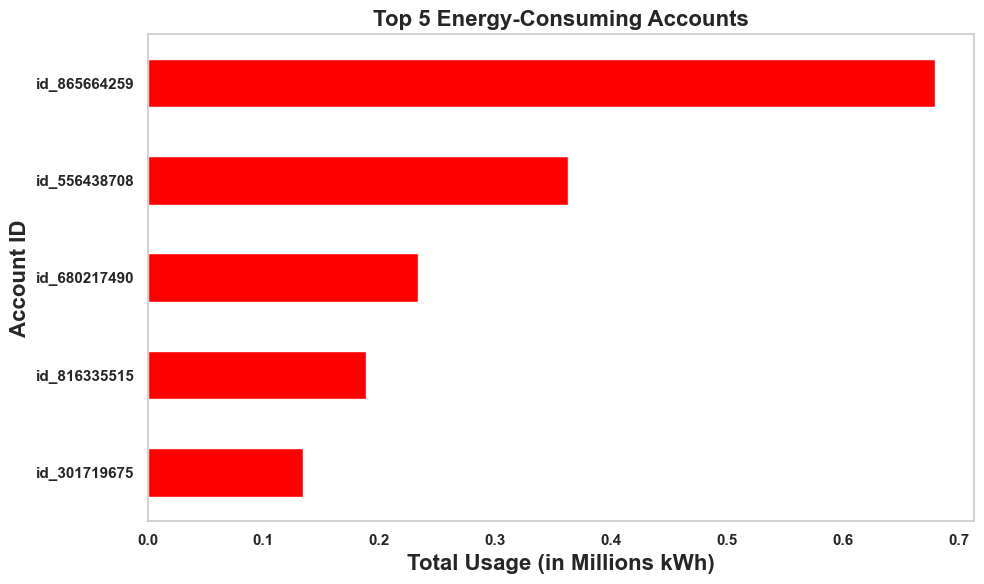

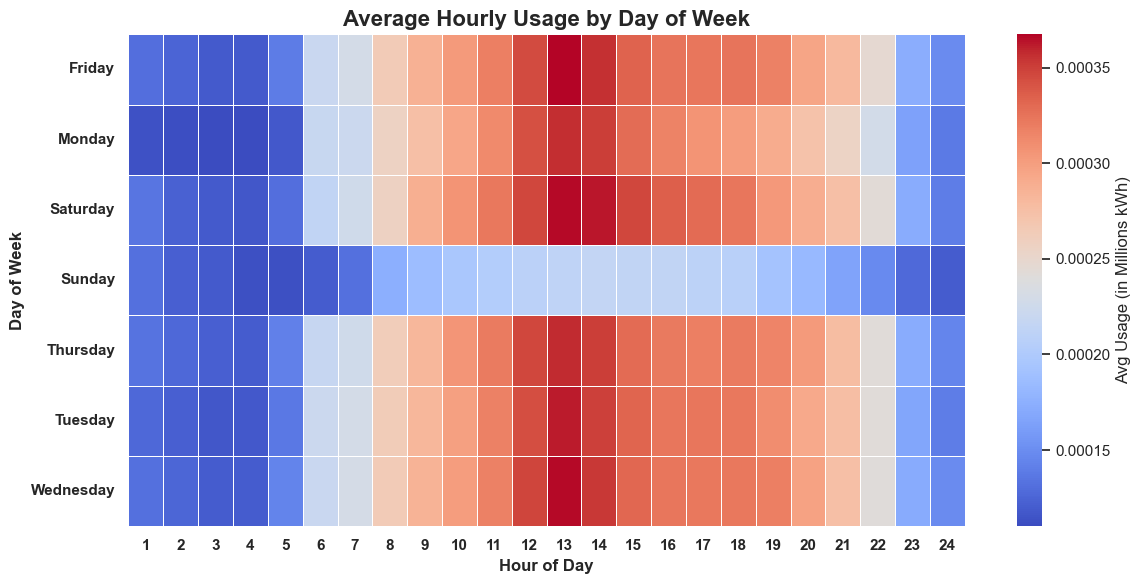

In [100]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Fix nulls and prepare time
commercial_df.fillna(0, inplace=True)
commercial_df['datetime'] = pd.to_datetime(commercial_df['date']) + pd.to_timedelta(commercial_df['hour'] - 1, unit='h')

# Recreate time features
commercial_df['month'] = commercial_df['datetime'].dt.month
commercial_df['day_of_week'] = commercial_df['datetime'].dt.day_name()
commercial_df['hour'] = commercial_df['datetime'].dt.hour

# Define numeric usage columns
non_usage_cols = ['Season', 'date', 'hour', 'datetime', 'month', 'day_of_week', 'season', 'total_usage']
usage_columns = [col for col in commercial_df.columns if col not in non_usage_cols and commercial_df[col].dtype in [np.float64, np.int64]]
commercial_df[usage_columns] = commercial_df[usage_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
commercial_df['total_usage'] = commercial_df[usage_columns].sum(axis=1)

# Derive season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
commercial_df['season'] = commercial_df['month'].apply(get_season)

# Aggregate summaries
seasonal_usage = commercial_df.groupby('season')['total_usage'].sum().sort_values(ascending=False)
hourly_avg_usage = commercial_df.groupby('hour')['total_usage'].mean().reindex(range(24), fill_value=0)
monthly_usage = commercial_df.groupby('month')['total_usage'].sum()
account_totals = commercial_df[usage_columns].sum().sort_values(ascending=False).head(5)
heatmap_data = commercial_df.groupby(['day_of_week', 'hour'])['total_usage'].mean().unstack()

# Adjust hourly index for plotting
hourly_avg_usage.index = np.arange(1, 25)
heatmap_data.columns = [h + 1 for h in heatmap_data.columns]

# Plotting with updated styles
figsize = (10, 6)

# 1. Seasonal Total Usage
plt.figure(figsize=figsize)
seasonal_usage.sort_values().div(1e6).plot(kind='bar', color="red")
plt.title("Total Electricity Usage by Season", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Hourly Average Usage
plt.figure(figsize=(10, 6))
(hourly_avg_usage / 1e6).plot(kind='line', marker='o', color='#e03c31')
plt.title("Average Hourly Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Avg Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=16, fontweight='bold')
plt.xticks(np.arange(1, 25), fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 3. Monthly Usage
plt.figure(figsize=figsize)
(monthly_usage / 1e6).plot(kind='bar', color="blue")
plt.title("Monthly Total Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 4. Top Accounts by Usage
plt.figure(figsize=figsize)
(account_totals / 1e6).sort_values().plot(kind='barh', color="red")
plt.title("Top 5 Energy-Consuming Accounts", fontsize=16, fontweight='bold')
plt.xlabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.ylabel("Account ID", fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 5. Heatmap of Usage by Day and Hour
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data / 1e6, cmap="coolwarm", linewidths=0.5, annot=False, cbar_kws={'label': 'Avg Usage (in Millions kWh)'})
plt.title("Average Hourly Usage by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Day of Week", fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

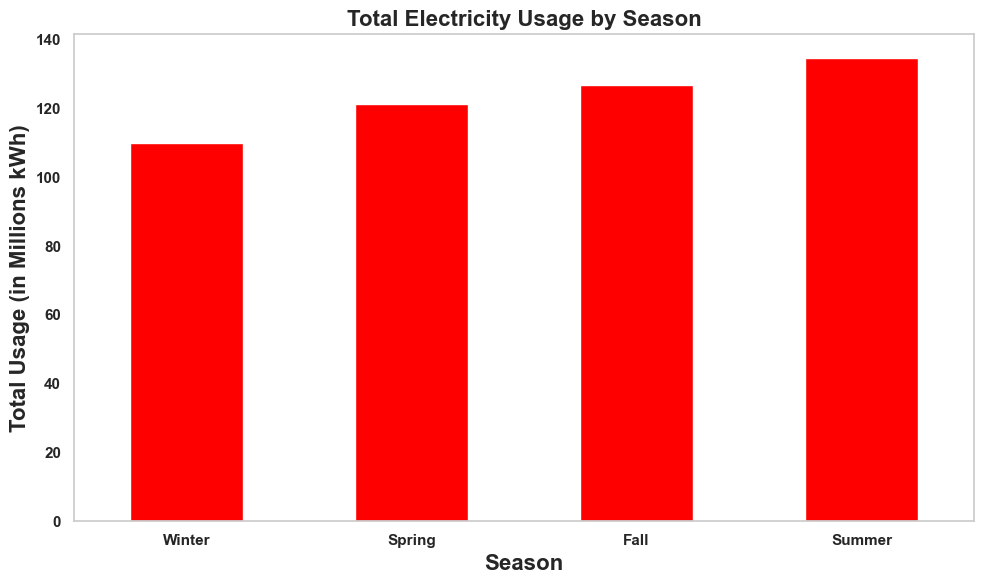

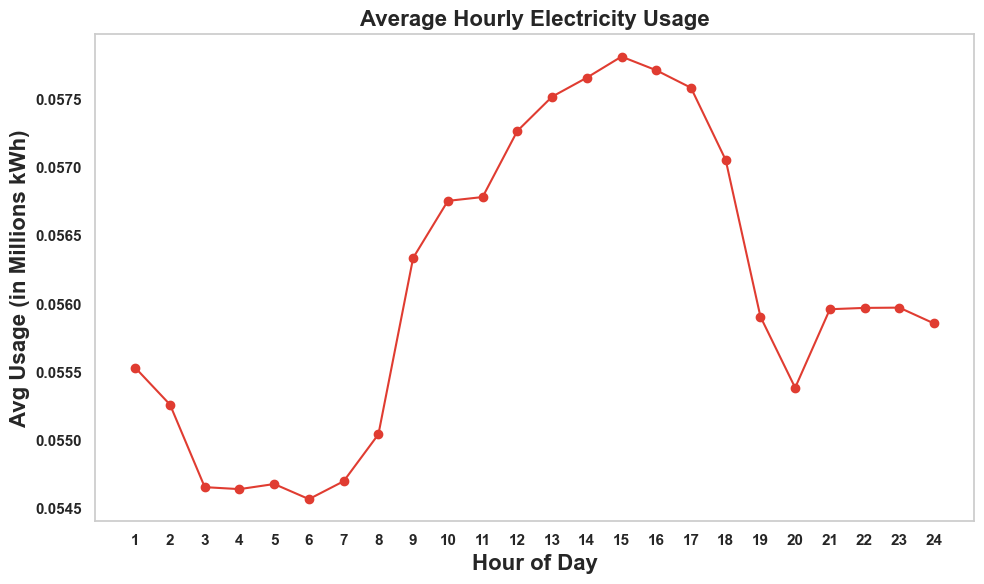

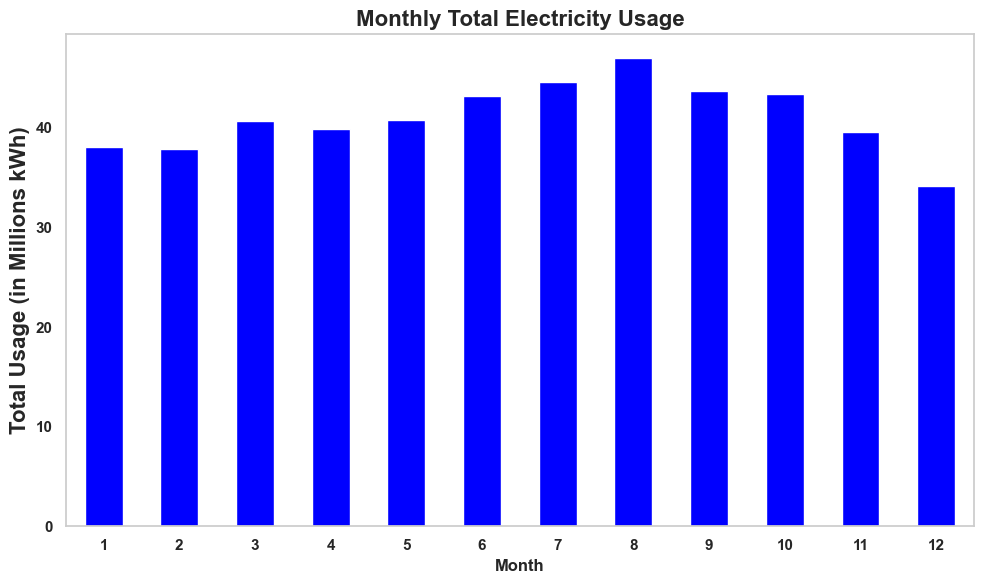

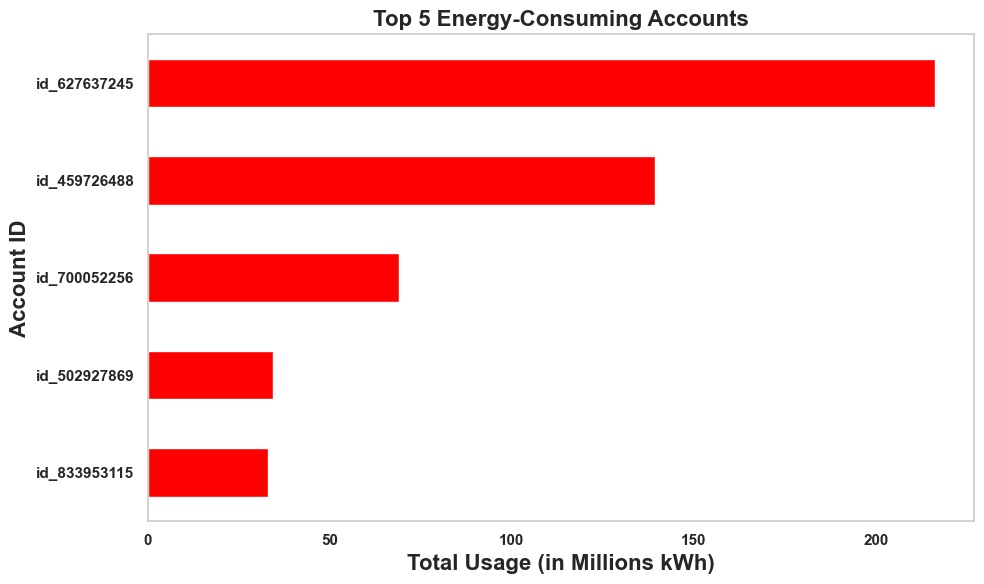

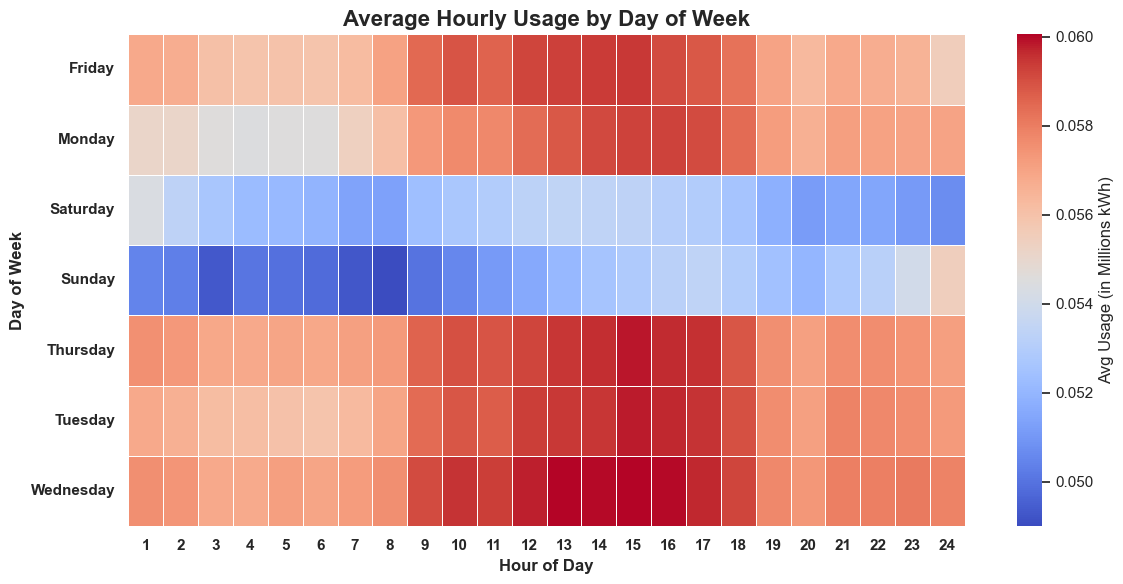

In [101]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Fix nulls and prepare time
industrial_df.fillna(0, inplace=True)
industrial_df['datetime'] = pd.to_datetime(industrial_df['date']) + pd.to_timedelta(industrial_df['hour'] - 1, unit='h')

# Recreate time features
industrial_df['month'] = industrial_df['datetime'].dt.month
industrial_df['day_of_week'] = industrial_df['datetime'].dt.day_name()
industrial_df['hour'] = industrial_df['datetime'].dt.hour

# Define numeric usage columns
non_usage_cols = ['Season', 'date', 'hour', 'datetime', 'month', 'day_of_week', 'season', 'total_usage']
usage_columns = [col for col in industrial_df.columns if col not in non_usage_cols and industrial_df[col].dtype in [np.float64, np.int64]]
industrial_df[usage_columns] = industrial_df[usage_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
industrial_df['total_usage'] = industrial_df[usage_columns].sum(axis=1)

# Derive season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
industrial_df['season'] = industrial_df['month'].apply(get_season)

# Aggregate summaries
seasonal_usage = industrial_df.groupby('season')['total_usage'].sum().sort_values(ascending=False)
hourly_avg_usage = industrial_df.groupby('hour')['total_usage'].mean().reindex(range(24), fill_value=0)
monthly_usage = industrial_df.groupby('month')['total_usage'].sum()
account_totals = industrial_df[usage_columns].sum().sort_values(ascending=False).head(5)
heatmap_data = industrial_df.groupby(['day_of_week', 'hour'])['total_usage'].mean().unstack()

# Adjust hourly index for plotting
hourly_avg_usage.index = np.arange(1, 25)
heatmap_data.columns = [h + 1 for h in heatmap_data.columns]

# Plotting with updated styles
figsize = (10, 6)

# 1. Seasonal Total Usage
plt.figure(figsize=figsize)
seasonal_usage.sort_values().div(1e6).plot(kind='bar', color="red")
plt.title("Total Electricity Usage by Season", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Hourly Average Usage
plt.figure(figsize=(10, 6))
(hourly_avg_usage / 1e6).plot(kind='line', marker='o', color='#e03c31')
plt.title("Average Hourly Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Avg Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=16, fontweight='bold')
plt.xticks(np.arange(1, 25), fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 3. Monthly Usage
plt.figure(figsize=figsize)
(monthly_usage / 1e6).plot(kind='bar', color="blue")
plt.title("Monthly Total Electricity Usage", fontsize=16, fontweight='bold')
plt.ylabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 4. Top Accounts by Usage
plt.figure(figsize=figsize)
(account_totals / 1e6).sort_values().plot(kind='barh', color="red")
plt.title("Top 5 Energy-Consuming Accounts", fontsize=16, fontweight='bold')
plt.xlabel("Total Usage (in Millions kWh)", fontsize=16, fontweight='bold')
plt.ylabel("Account ID", fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# 5. Heatmap of Usage by Day and Hour
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data / 1e6, cmap="coolwarm", linewidths=0.5, annot=False, cbar_kws={'label': 'Avg Usage (in Millions kWh)'})
plt.title("Average Hourly Usage by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Day of Week", fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

In [145]:
# Load the energy usage and weather data
usage_path = "Hourly_usage.xlsx"
weather_path = "Weather.xlsx"

# Load usage data
usage_df = pd.read_excel(usage_path).fillna(0)

# Load weather data
weather_df = pd.read_excel(weather_path).fillna(0)

# Display first few rows of each dataset to confirm structure
usage_df.head(), weather_df.head()


(        date  hour  id_865664259  ...  id_627637245  id_400133509  id_833953115
 0 2024-01-01     1         24.24  ...       11502.0         30.76         758.7
 1 2024-01-01     2         25.24  ...       11485.8         30.38         758.7
 2 2024-01-01     3         25.20  ...       11502.0         30.58         772.2
 3 2024-01-01     4         24.72  ...       11510.1         30.58         764.1
 4 2024-01-01     5         24.64  ...       11566.8         30.62         801.9
 
 [5 rows x 28 columns],
         Date  Hour  DRY_BULB_TEMP
 0 2024-01-01     1          41.59
 1 2024-01-01     2          41.12
 2 2024-01-01     3          40.55
 3 2024-01-01     4          40.19
 4 2024-01-01     5          40.87)

In [146]:
# Step 1: Standardize column names for merging
usage_df = usage_df.rename(columns={"date": "Date", "hour": "Hour"})
weather_df = weather_df.rename(columns={"Date": "Date", "Hour": "Hour"})

# Step 2: Merge on Date and Hour
merged_df = pd.merge(usage_df, weather_df, on=["Date", "Hour"])

# Step 3: Compute total usage per hour (sum across all account columns)
usage_columns = merged_df.columns.difference(["Date", "Hour", "DRY_BULB_TEMP"])
merged_df["total_usage"] = merged_df[usage_columns].sum(axis=1)

# Step 4: Display merged data with temperature and total usage
merged_df_filtered = merged_df[["Date", "Hour", "DRY_BULB_TEMP", "total_usage"]]

# Step 5: Calculate correlation between temperature and total usage
correlation = merged_df_filtered["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation


0.5179851436902436

In [147]:
merged_df_filtered.head()

,Date,Hour,DRY_BULB_TEMP,total_usage
0,2024-01-01,1,41.59,28832.1289
1,2024-01-01,2,41.12,29068.2930
2,2024-01-01,3,40.55,29022.1669
3,2024-01-01,4,40.19,29192.9100
4,2024-01-01,5,40.87,29249.5739


In [148]:
merged_df.head()

,Date,Hour,id_865664259,id_556438708,id_797210973,id_159394858,id_398371246,id_622078427,id_247562058,id_423657958,id_339238458,id_867297720,id_424331807,id_680217490,id_126971710,id_935947466,id_876648295,id_700971314,id_816335515,id_301719675,id_236845199,id_496557256,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115,DRY_BULB_TEMP,total_usage
0,2024-01-01,1,24.24,19.800,5.28,5.811,1.3899,0.310,3.0,3.88,5.760,0.7360,0.218,19.12,0.3350,3.369,4.964,3.491,16.064,4.992,0.190,0.169,1494.6,6949.95,7973.0,11502.0,30.76,758.7,41.59,28832.1289
1,2024-01-01,2,25.24,19.320,6.08,5.298,0.9940,0.401,3.0,3.68,5.760,0.2210,0.220,21.84,0.3200,2.340,4.861,3.487,16.320,6.400,0.199,0.082,1491.0,7063.35,8113.0,11485.8,30.38,758.7,41.12,29068.2930
2,2024-01-01,3,25.20,19.788,5.44,5.730,0.9360,0.400,7.0,3.88,5.728,0.1739,0.214,22.00,0.2430,1.289,4.930,3.411,17.152,23.424,0.272,0.126,1486.8,6956.25,8127.0,11502.0,30.58,772.2,40.55,29022.1669
3,2024-01-01,4,24.72,19.440,5.60,5.211,0.9000,0.433,8.0,4.32,3.968,0.1870,0.243,20.72,0.2810,1.211,4.852,2.283,17.152,9.600,0.279,0.080,1480.8,7094.85,8183.0,11510.1,30.58,764.1,40.19,29192.9100
4,2024-01-01,5,24.64,19.800,4.96,6.452,1.0360,0.495,7.0,3.88,3.872,0.2120,0.227,16.80,0.3469,0.981,5.588,2.251,17.472,4.864,0.196,0.081,1488.0,6953.10,8288.0,11566.8,30.62,801.9,40.87,29249.5739


In [149]:
merged_residential = merged_df[["Date", "Hour"] + residential_ids].copy()
merged_industrial = merged_df[["Date", "Hour"]  + industrial_ids].copy()
merged_commercial = merged_df[["Date", "Hour"]  + commercial_ids].copy()

In [150]:
merged_residential["total_usage"] = merged_df[residential_ids].sum(axis=1)
merged_industrial["total_usage"] = merged_df[industrial_ids].sum(axis=1)
merged_commercial["total_usage"] = merged_df[commercial_ids].sum(axis=1)

In [151]:
correlation_res = merged_residential["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation_res

0.5179851436902437

In [152]:
correlation_ind = merged_industrial["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation_ind

c:\Users\agboo\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\agboo\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

In [153]:
correlation_com = merged_commercial["total_usage"] .corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation_com

nan

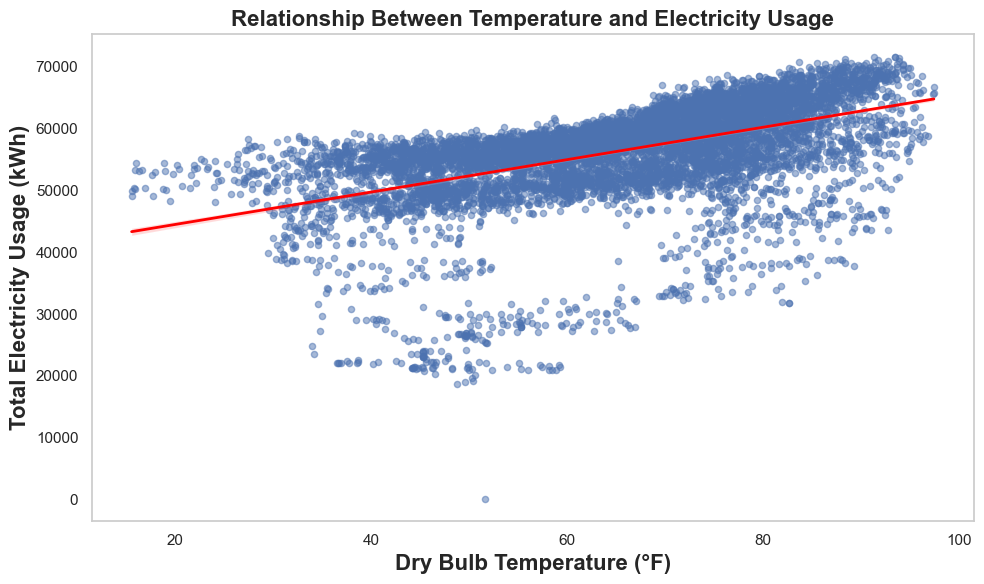

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    data=merged_df_filtered,
    x="DRY_BULB_TEMP",
    y="total_usage",
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2}
)

# Titles and labels
plt.title("Relationship Between Temperature and Electricity Usage", fontsize=16, fontweight='bold')
plt.xlabel("Dry Bulb Temperature (°F)", fontsize=16, fontweight='bold')
plt.ylabel("Total Electricity Usage (kWh)", fontsize=16, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


c:\Users\agboo\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\agboo\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


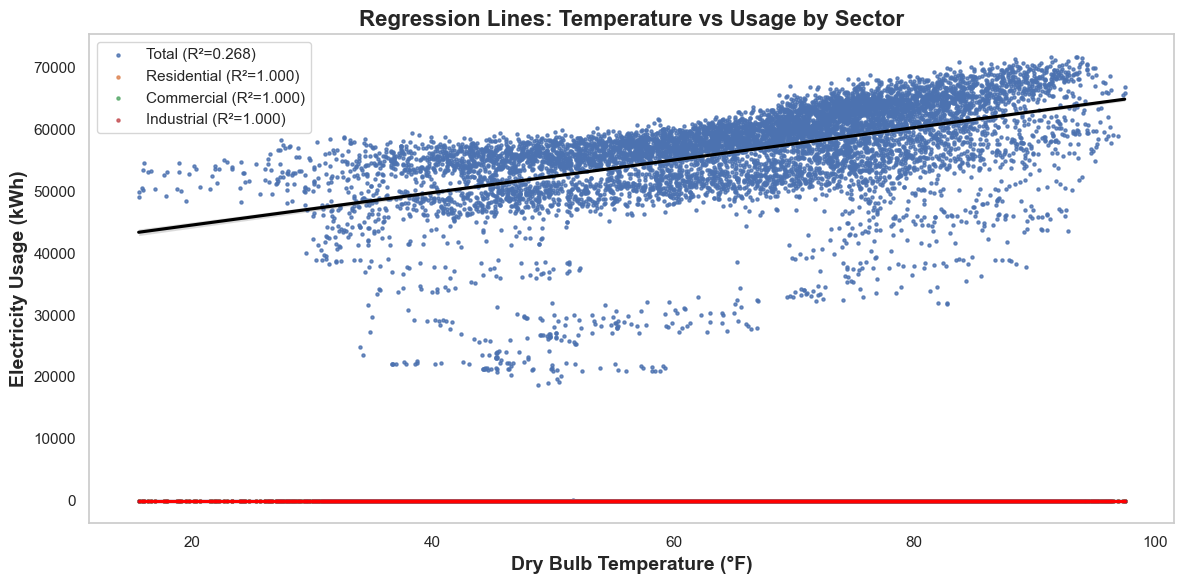

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Recompute merged sectoral data
residential_ids = [col for col in merged_df.columns if 'Residential' in col]
commercial_ids = [col for col in merged_df.columns if 'Commercial' in col]
industrial_ids = [col for col in merged_df.columns if 'Industrial' in col]

# Create sector-specific DataFrames
merged_residential = merged_df[["Date", "Hour"]].copy()
merged_commercial = merged_df[["Date", "Hour"]].copy()
merged_industrial = merged_df[["Date", "Hour"]].copy()

merged_residential["total_usage"] = merged_df[residential_ids].sum(axis=1)
merged_commercial["total_usage"] = merged_df[commercial_ids].sum(axis=1)
merged_industrial["total_usage"] = merged_df[industrial_ids].sum(axis=1)

# Compute correlations
corr_total = merged_df_filtered["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
corr_res = merged_residential["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
corr_com = merged_commercial["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
corr_ind = merged_industrial["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])

# Regression model for R^2
def compute_r2(x, y):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    return model.score(x.reshape(-1, 1), y)

temp = merged_df_filtered["DRY_BULB_TEMP"].values
r2_total = compute_r2(temp, merged_df_filtered["total_usage"].values)
r2_res = compute_r2(temp, merged_residential["total_usage"].values)
r2_com = compute_r2(temp, merged_commercial["total_usage"].values)
r2_ind = compute_r2(temp, merged_industrial["total_usage"].values)

# Plotting
plt.figure(figsize=(12, 6))
sns.regplot(x=temp, y=merged_df_filtered["total_usage"], label=f"Total (R²={r2_total:.3f})", scatter_kws={'s':5}, line_kws={'color':'black'})
sns.regplot(x=temp, y=merged_residential["total_usage"], label=f"Residential (R²={r2_res:.3f})", scatter_kws={'s':5}, line_kws={'color':'green'})
sns.regplot(x=temp, y=merged_commercial["total_usage"], label=f"Commercial (R²={r2_com:.3f})", scatter_kws={'s':5}, line_kws={'color':'blue'})
sns.regplot(x=temp, y=merged_industrial["total_usage"], label=f"Industrial (R²={r2_ind:.3f})", scatter_kws={'s':5}, line_kws={'color':'red'})

plt.title("Regression Lines: Temperature vs Usage by Sector", fontsize=16, fontweight='bold')
plt.xlabel("Dry Bulb Temperature (°F)", fontsize=14, fontweight='bold')
plt.ylabel("Electricity Usage (kWh)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Create bold summary DataFrame
import pandas as pd
summary_df = pd.DataFrame({
    "Sector": ["Total", "Residential", "Commercial", "Industrial"],
    "Correlation": [corr_total, corr_res, corr_com, corr_ind],
    "R-squared": [r2_total, r2_res, r2_com, r2_ind]
})




In [126]:
summary_df

,Sector,Correlation,R-squared
0,Total,0.517985,0.268309
1,Residential,NaN,1.000000
2,Commercial,NaN,1.000000
3,Industrial,NaN,1.000000


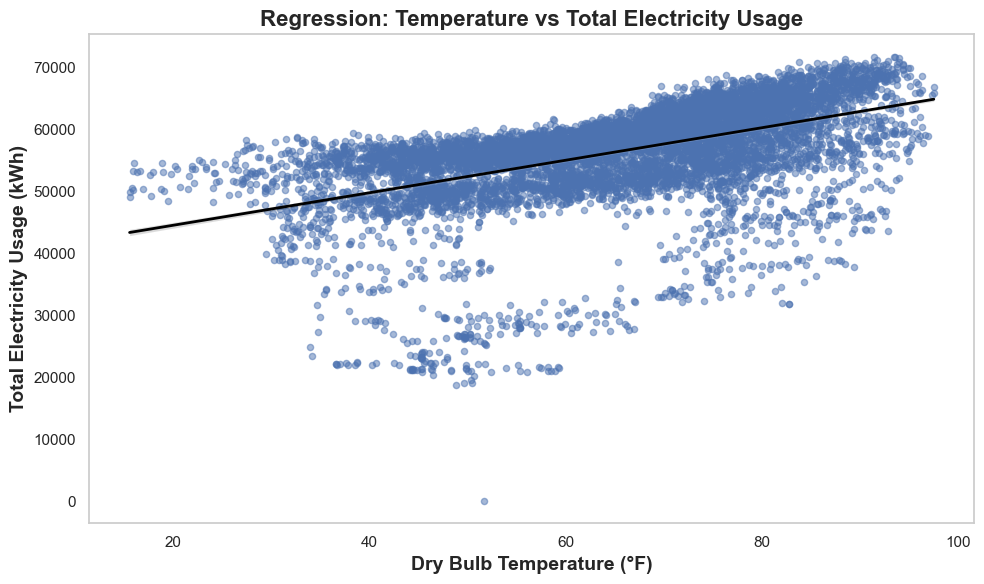

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reload the data
usage_df = pd.read_excel("Hourly_usage.xlsx")
weather_df = pd.read_excel("Weather.xlsx")

# Standardize column names for merging
usage_df.rename(columns={"date": "Date", "hour": "Hour"}, inplace=True)

# Fill NA with 0
usage_df.fillna(0, inplace=True)

# Merge on Date and Hour
merged_df = pd.merge(usage_df, weather_df, on=["Date", "Hour"], how="inner")

# Identify account types
residential_ids = [col for col in usage_df.columns if col.startswith("id_") and usage_df[col].max() < 100000]
commercial_ids = [col for col in usage_df.columns if col.startswith("id_") and 100000 <= usage_df[col].max() < 5000000]
industrial_ids = [col for col in usage_df.columns if col.startswith("id_") and usage_df[col].max() >= 5000000]

# Compute sector usage
merged_df["residential_usage"] = merged_df[residential_ids].sum(axis=1)
merged_df["commercial_usage"] = merged_df[commercial_ids].sum(axis=1)
merged_df["industrial_usage"] = merged_df[industrial_ids].sum(axis=1)
merged_df["total_usage"] = merged_df["residential_usage"] + merged_df["commercial_usage"] + merged_df["industrial_usage"]

# Plot regression for total usage only
plt.figure(figsize=(10, 6))
sns.regplot(
    x="DRY_BULB_TEMP",
    y="total_usage",
    data=merged_df,
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'black', 'lw': 2}
)
plt.title("Regression: Temperature vs Total Electricity Usage", fontsize=16, fontweight='bold')
plt.xlabel("Dry Bulb Temperature (°F)", fontsize=14, fontweight='bold')
plt.ylabel("Total Electricity Usage (kWh)", fontsize=14, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


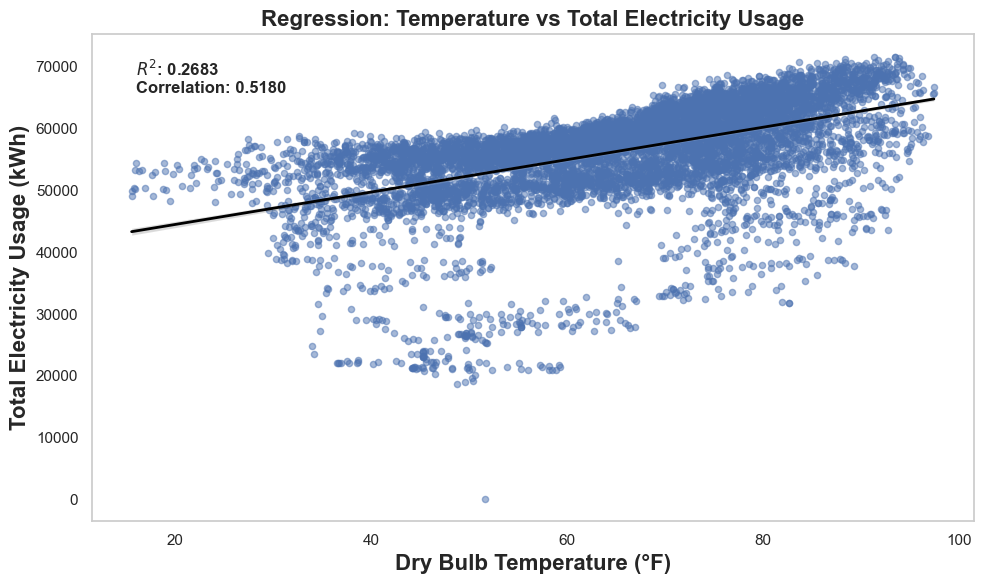

In [130]:
from scipy.stats import linregress

# Perform linear regression for total usage
slope, intercept, r_value, p_value, std_err = linregress(
    merged_df["DRY_BULB_TEMP"], merged_df["total_usage"]
)

# Create regression plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x="DRY_BULB_TEMP",
    y="total_usage",
    data=merged_df,
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'black', 'lw': 2}
)

# Annotate with R² and correlation
plt.text(
    0.05, 0.95,
    f"$R^2$: {r_value**2:.4f}\nCorrelation: {r_value:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    fontweight='bold',
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

# Final plot formatting
plt.title("Regression: Temperature vs Total Electricity Usage", fontsize=16, fontweight='bold')
plt.xlabel("Dry Bulb Temperature (°F)", fontsize=16, fontweight='bold')
plt.ylabel("Total Electricity Usage (kWh)", fontsize=16, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:


# Compute correlations
correlation_res = merged_residential["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation_com = merged_commercial["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation_ind = merged_industrial["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])
correlation_total = merged_df_filtered["total_usage"].corr(merged_df_filtered["DRY_BULB_TEMP"])

# R² values
r2_res = round(correlation_res**2, 4)
r2_com = round(correlation_com**2, 4)
r2_ind = round(correlation_ind**2, 4)
r2_total = round(correlation_total**2, 4)

# DataFrame output
final_results_df = pd.DataFrame({
    "Sector": ["Total", "Residential", "Commercial", "Industrial"],
    "R²": [r2_total, r2_res, r2_com, r2_ind],
    "Correlation": [
        round(correlation_total, 4),
        round(correlation_res, 4),
        round(correlation_com, 4),
        round(correlation_ind, 4)
    ]
})
final_results_df

c:\Users\agboo\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\agboo\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Sector,R²,Correlation
0,Total,0.2683,0.518
1,Residential,NaN,NaN
2,Commercial,NaN,NaN
3,Industrial,NaN,NaN


In [133]:
correlation_res

nan

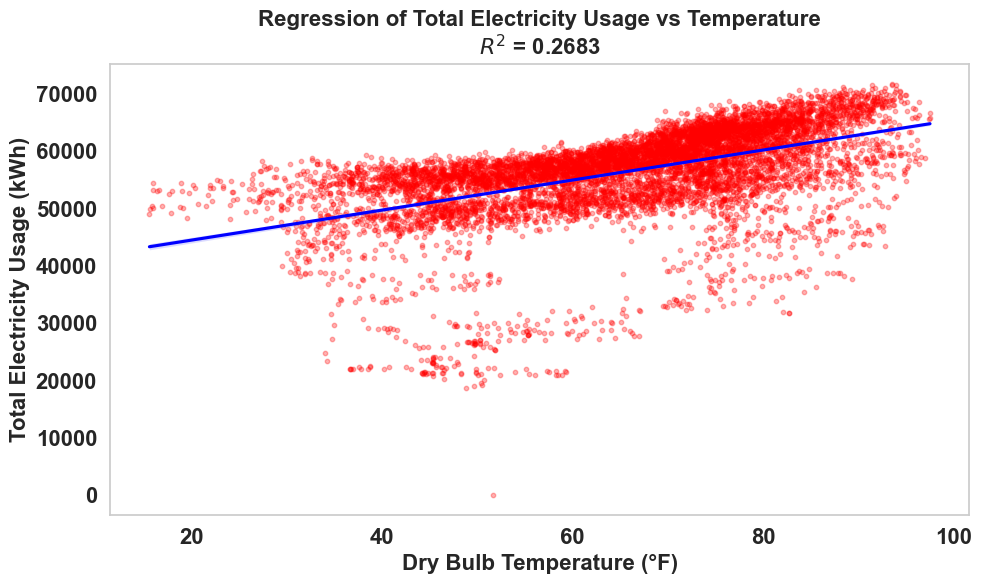

,Correlation,R2
Total,0.5180,0.2683
Commercial,0.5559,0.3090
Residential,0.4143,0.1716
Industrial,0.5133,0.2635


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Read data
usage_df = pd.read_excel("Hourly_usage.xlsx")
weather_df = pd.read_excel("Weather.xlsx")

# Preprocess usage data
usage_df = usage_df.fillna(0)
usage_df['Date'] = pd.to_datetime(usage_df['date'])

# Preprocess weather data
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Hour'] = weather_df['Hour'].astype(int)

# Merge datasets
merged_df = pd.merge(
    usage_df,
    weather_df[["Date", "Hour", "DRY_BULB_TEMP"]],
    left_on=["Date", "hour"],
    right_on=["Date", "Hour"],
    how="inner"
)

# Sector customer IDs
commercial_ids = [
    "id_865664259", "id_556438708", "id_797210973", "id_159394858",
    "id_423657958", "id_339238458", "id_680217490", "id_876648295",
    "id_816335515", "id_301719675"
]

residential_ids = [
    "id_398371246", "id_622078427", "id_247562058", "id_867297720",
    "id_424331807", "id_126971710", "id_935947466", "id_700971314",
    "id_236845199", "id_496557256"
]

industrial_ids = [
    "id_502927869", "id_700052256", "id_459726488", "id_627637245",
    "id_400133509", "id_833953115"
]

# Compute sector usages
merged_df["total_usage"] = merged_df[commercial_ids + residential_ids + industrial_ids].sum(axis=1)
merged_df["commercial_usage"] = merged_df[commercial_ids].sum(axis=1)
merged_df["residential_usage"] = merged_df[residential_ids].sum(axis=1)
merged_df["industrial_usage"] = merged_df[industrial_ids].sum(axis=1)

# Fit regression for total
X = merged_df[["DRY_BULB_TEMP"]]
y = merged_df["total_usage"]
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2_total = r2_score(y, y_pred)

# Plot total regression
plt.figure(figsize=(10, 6))
sns.regplot(x="DRY_BULB_TEMP", y="total_usage", data=merged_df,
            scatter_kws={'s':10, 'alpha':0.3, 'color':'red'},
            line_kws={'color':'blue'})
plt.title(f"Regression of Total Electricity Usage vs Temperature\n$R^2$ = {r2_total:.4f}",
          fontsize=16, fontweight='bold')
plt.xlabel("Dry Bulb Temperature (°F)", fontsize=16, fontweight='bold')
plt.ylabel("Total Electricity Usage (kWh)", fontsize=16, fontweight='bold')
plt.grid(False)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Compute stats for each sector
def compute_stats(sector_usage):
    if sector_usage.std() == 0:
        return {"Correlation": np.nan, "R2": np.nan}
    reg = LinearRegression().fit(X, sector_usage)
    return {
        "Correlation": sector_usage.corr(merged_df["DRY_BULB_TEMP"]),
        "R2": r2_score(sector_usage, reg.predict(X))
    }

# Build summary DataFrame
stats_df = pd.DataFrame({
    "Total": compute_stats(merged_df["total_usage"]),
    "Commercial": compute_stats(merged_df["commercial_usage"]),
    "Residential": compute_stats(merged_df["residential_usage"]),
    "Industrial": compute_stats(merged_df["industrial_usage"]),
}).T

# Beautify output
stats_df = stats_df.round(4)
from IPython.display import display
display(stats_df)




C:\Users\agboo\AppData\Local\Temp\ipykernel_13540\1714229177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = merged_df.groupby('temp_bin')['total_usage'].mean()


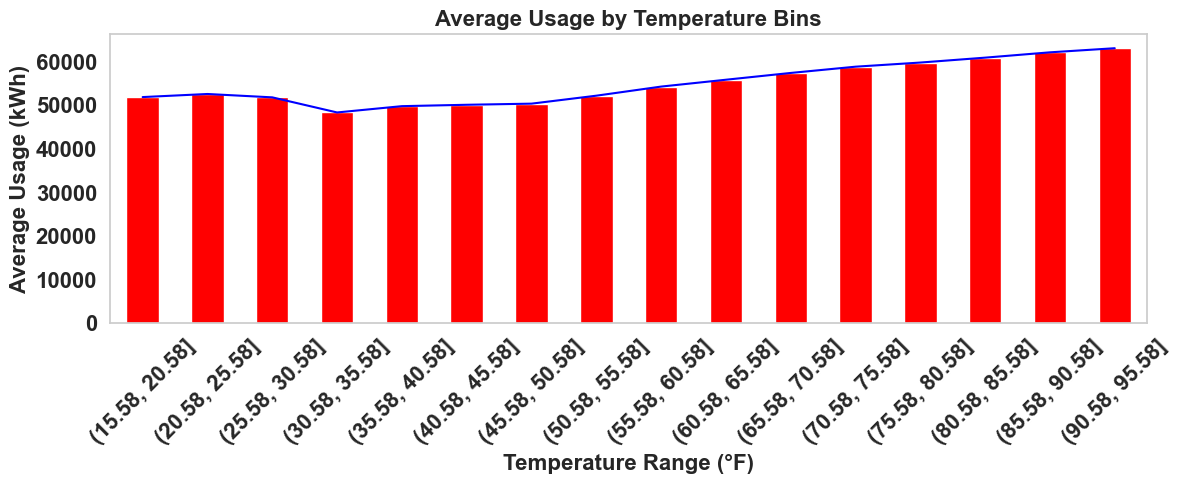

In [170]:
merged_df['temp_bin'] = pd.cut(merged_df['DRY_BULB_TEMP'], bins=np.arange(merged_df['DRY_BULB_TEMP'].min(), merged_df['DRY_BULB_TEMP'].max(), 5))
bin_avg = merged_df.groupby('temp_bin')['total_usage'].mean()

bin_avg.plot(kind='bar', figsize=(12,5), color="red")
bin_avg.plot(kind='line', figsize=(12,5), color="blue")
plt.title("Average Usage by Temperature Bins", fontsize=16, fontweight='bold')
plt.ylabel("Average Usage (kWh)", fontsize=16, fontweight='bold')
plt.xlabel("Temperature Range (°F)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


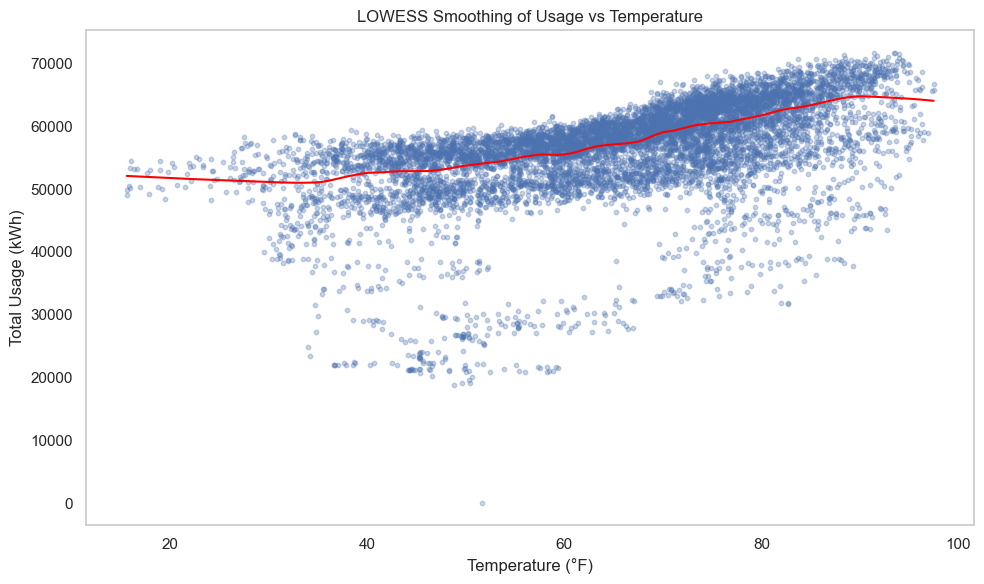

In [165]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
smoothed = lowess(merged_df['total_usage'], merged_df['DRY_BULB_TEMP'], frac=0.1)

plt.figure(figsize=(10,6))
plt.scatter(merged_df['DRY_BULB_TEMP'], merged_df['total_usage'], alpha=0.3, s=10)
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red')
plt.title("LOWESS Smoothing of Usage vs Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Total Usage (kWh)")
plt.grid(False)
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Load the uploaded Excel file
file_path = 'Hourly_usage.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
sheet_names = xls.sheet_names
sheet_names


['Hourly Usage']

In [21]:
# Load the data from the relevant sheet
df = pd.read_excel(xls, sheet_name='Hourly Usage')

# Show the first few rows to understand the structure
df.head()


,date,hour,id_865664259,id_556438708,id_797210973,id_159394858,id_398371246,id_622078427,id_247562058,id_423657958,...,id_816335515,id_301719675,id_236845199,id_496557256,id_502927869,id_700052256,id_459726488,id_627637245,id_400133509,id_833953115
0,2024-01-01,1,24.24,19.800,5.28,5.811,1.3899,0.310,3.0,3.88,...,16.064,4.992,0.190,0.169,1494.6,6949.95,7973.0,11502.0,30.76,758.7
1,2024-01-01,2,25.24,19.320,6.08,5.298,0.9940,0.401,3.0,3.68,...,16.320,6.400,0.199,0.082,1491.0,7063.35,8113.0,11485.8,30.38,758.7
2,2024-01-01,3,25.20,19.788,5.44,5.730,0.9360,0.400,7.0,3.88,...,17.152,23.424,0.272,0.126,1486.8,6956.25,8127.0,11502.0,30.58,772.2
3,2024-01-01,4,24.72,19.440,5.60,5.211,0.9000,0.433,8.0,4.32,...,17.152,9.600,0.279,0.080,1480.8,7094.85,8183.0,11510.1,30.58,764.1
4,2024-01-01,5,24.64,19.800,4.96,6.452,1.0360,0.495,7.0,3.88,...,17.472,4.864,0.196,0.081,1488.0,6953.10,8288.0,11566.8,30.62,801.9


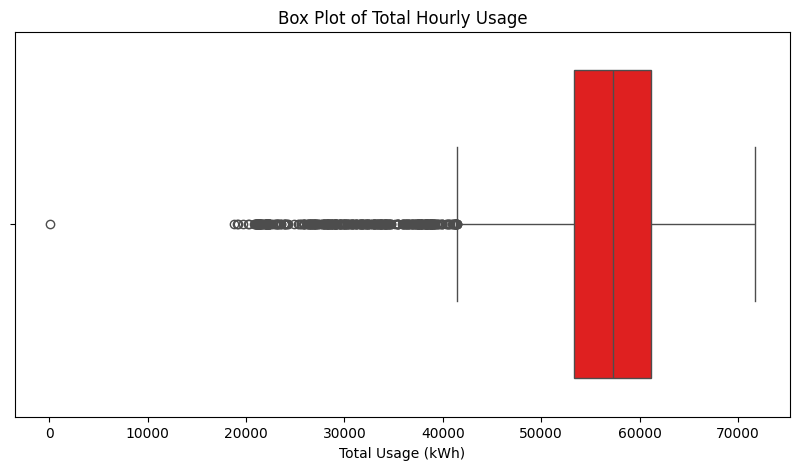

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total usage across all IDs
df['total_usage'] = df.drop(columns=['date', 'hour']).sum(axis=1)

# Create a box plot to detect anomalies
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['total_usage'],  color="red")
plt.title("Box Plot of Total Hourly Usage")
plt.xlabel("Total Usage (kWh)")
plt.grid(False)
plt.show()


In [26]:
!pip install prophet




  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------- ----------------------------- 3.4/13.3 MB 18.3 MB/s eta 0:00:01
   ---------------------- ----------------- 7.3/13.3 MB 18.9 MB/s eta 0:00:01
   --------------------------------- ------ 11.0/13.3 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 18.6 MB/s eta 0:00:00
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
   ---------------------------------------- 0.0/991.0 kB ? eta -:--:--
   --------------------------------------- 991.0/991.0 kB 23.5 MB/s eta 0:00:00
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)


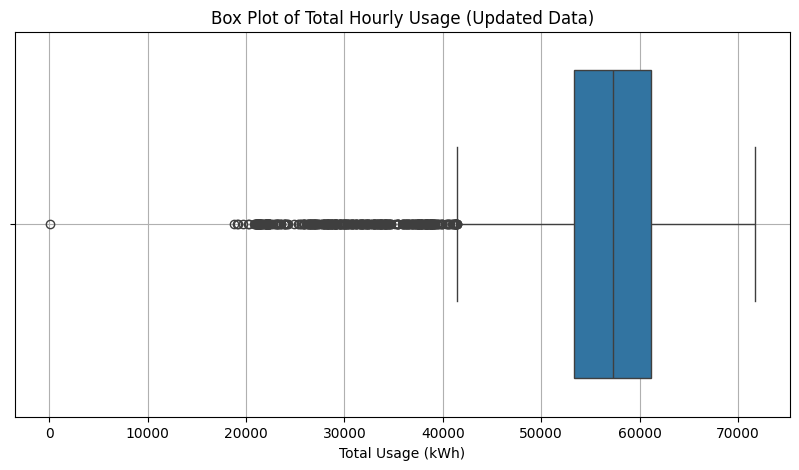

10:19:32 - cmdstanpy - INFO - Chain [1] start processing
10:19:34 - cmdstanpy - INFO - Chain [1] done processing


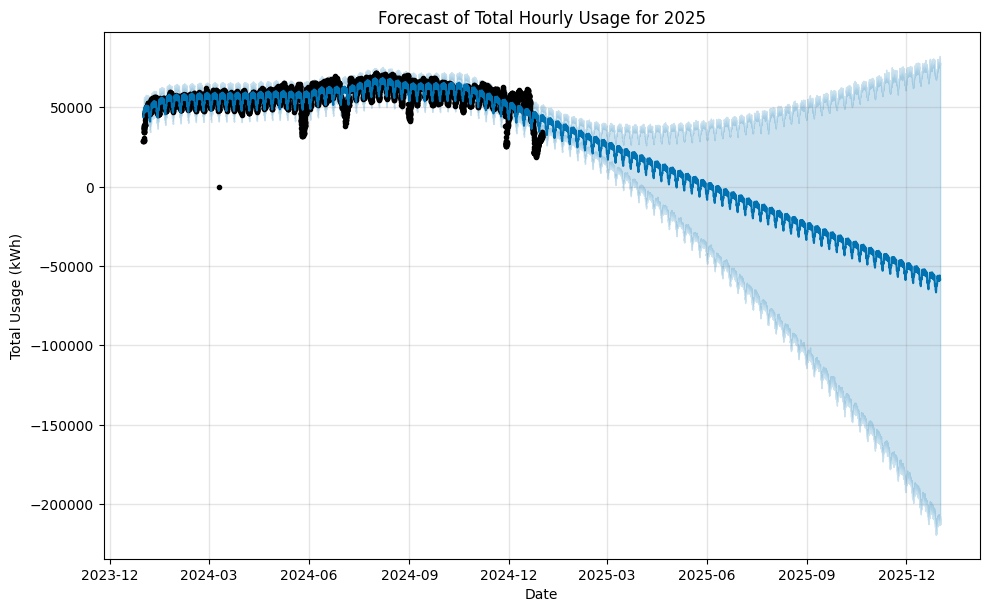

In [29]:
from prophet import Prophet
# Calculate total hourly usage
# Reload the newly uploaded Excel file
new_file_path = 'Hourly_usage.xlsx'
xls_new = pd.ExcelFile(new_file_path)

# Load the data from the relevant sheet
df_new = pd.read_excel(xls_new, sheet_name='Hourly Usage')

# Preview the data to ensure it's in the correct format
df_new.head()

df_new['total_usage'] = df_new.drop(columns=['date', 'hour']).sum(axis=1)

# Create a box plot again to visualize anomalies
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_new['total_usage'])
plt.title("Box Plot of Total Hourly Usage (Updated Data)")
plt.xlabel("Total Usage (kWh)")
plt.grid(True)
plt.show()

# Prepare the time series data for Prophet
df_prophet = df_new[['date', 'hour', 'total_usage']].copy()
df_prophet['datetime'] = pd.to_datetime(df_prophet['date']) + pd.to_timedelta(df_prophet['hour'] - 1, unit='h')
df_prophet = df_prophet[['datetime', 'total_usage']].rename(columns={'datetime': 'ds', 'total_usage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe for hourly forecast for 2025 (365 * 24 hours)
future = model.make_future_dataframe(periods=365 * 24, freq='H')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecast of Total Hourly Usage for 2025")
plt.xlabel("Date")
plt.ylabel("Total Usage (kWh)")
plt.grid(True)
plt.show()


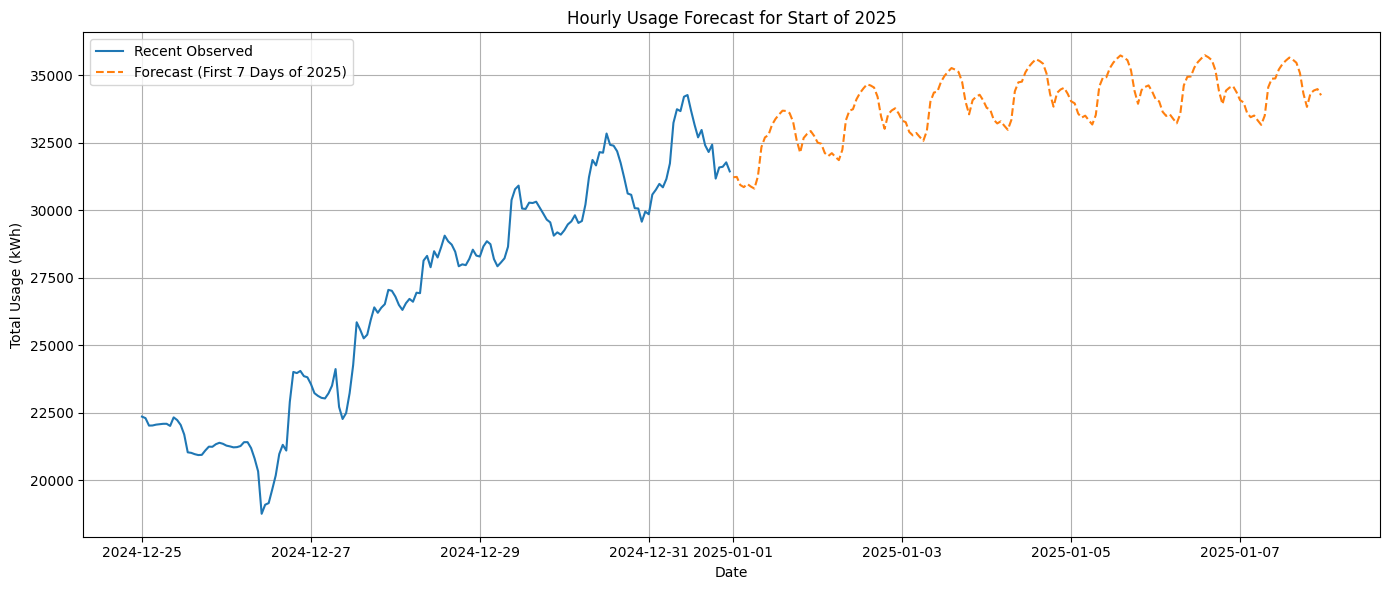

In [31]:
# Fallback to a different model (e.g., SARIMAX from statsmodels) since Prophet is unavailable
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set datetime as index
df_sarima = df_prophet.set_index('ds').asfreq('H')

# Fit SARIMAX model
model_sarima = SARIMAX(df_sarima['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = model_sarima.fit(disp=False)

# Forecast for 2025 (365 * 24 = 8760 hours)
forecast_steps = 365 * 24
forecast_sarima = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_sarima.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_df = pd.DataFrame({
    'ds': forecast_index,
    'forecast': forecast_sarima.predicted_mean
})

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df_sarima.index[-24*7:], df_sarima['y'][-24*7:], label='Recent Observed')
plt.plot(forecast_df['ds'][:24*7], forecast_df['forecast'][:24*7], label='Forecast (First 7 Days of 2025)', linestyle='--')
plt.title("Hourly Usage Forecast for Start of 2025")
plt.xlabel("Date")
plt.ylabel("Total Usage (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


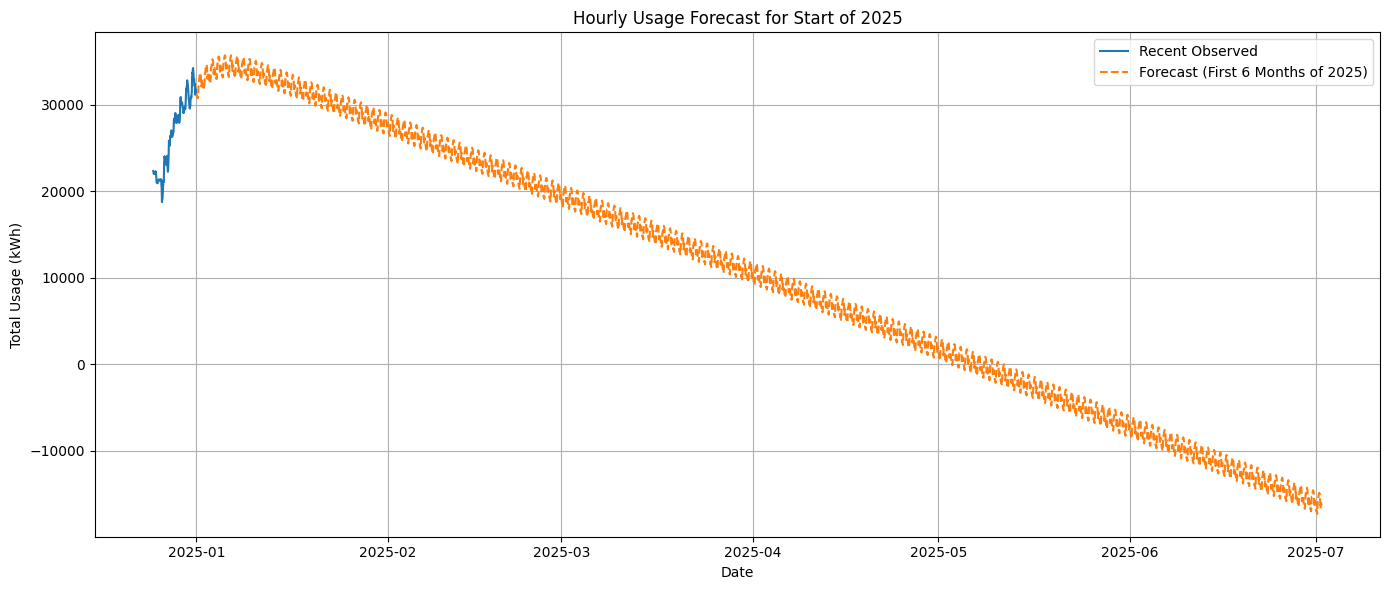

In [33]:
# Re-create the datetime-based time series since Prophet failed earlier
df_prophet = df_new[['date', 'hour', 'total_usage']].copy()
df_prophet['datetime'] = pd.to_datetime(df_prophet['date']) + pd.to_timedelta(df_prophet['hour'] - 1, unit='h')
df_prophet = df_prophet[['datetime', 'total_usage']].rename(columns={'datetime': 'ds', 'total_usage': 'y'})

# Now proceed with SARIMA modeling
df_sarima = df_prophet.set_index('ds').asfreq('H')

# Fit SARIMAX model
model_sarima = SARIMAX(df_sarima['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = model_sarima.fit(disp=False)

# Forecast for 2025 (365 * 24 = 8760 hours)
forecast_steps = 365 * 24
forecast_sarima = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_sarima.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_df = pd.DataFrame({
    'ds': forecast_index,
    'forecast': forecast_sarima.predicted_mean
})

# Plot forecast for first 6 months (approx. 182 days * 24 hours)
forecast_hours_6months = 182 * 24

plt.figure(figsize=(14, 6))
plt.plot(df_sarima.index[-24*7:], df_sarima['y'][-24*7:], label='Recent Observed')
plt.plot(forecast_df['ds'][:forecast_hours_6months], forecast_df['forecast'][:forecast_hours_6months],
         label='Forecast (First 6 Months of 2025)', linestyle='--')
plt.title("Hourly Usage Forecast for Start of 2025")
plt.xlabel("Date")
plt.ylabel("Total Usage (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
